In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

In [58]:
d90_file = '../results/complexity_utf-16_10_10_10_bibles_90_lcm.csv'
dall_file = '../results/complexity_utf-16_10_10_10_bibles_lcm.csv'
d90_file_old = '../results/complexity_utf-16_10_10_10_bibles_90_lcm_old.csv'
dall_file_old = '../results/complexity_utf-16_10_10_10_bibles_lcm_old.csv'
df90 = pd.read_csv(d90_file)
dfall = pd.read_csv(dall_file)
df90_old = pd.read_csv(d90_file_old)
dfall_old = pd.read_csv(dall_file_old)

In [70]:
def calculate_sem(group):
    std = group['value'].std()
    n = len(group)
    sem = std / np.sqrt(n)
    return sem

def calculate_mean(group):
    mean = group['value'].mean()
    return mean

In [80]:
def calculate_sem_per_group(df):
    sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_sem).reset_index()
    sem_stats.columns = ['language', 'algorithm', 'metric', 'sem']
    return sem_stats

def calculate_mean_per_group(df):
    sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_mean).reset_index()
    sem_stats.columns = ['language', 'algorithm', 'metric', 'mean']
    return sem_stats

sem_90 = calculate_sem_per_group(df90)
sem_all = calculate_sem_per_group(dfall)

sem_90_old = calculate_sem_per_group(df90_old)
sem_all_old = calculate_sem_per_group(dfall_old)

sem_90.to_csv('../results/sem_90_output.csv', index=False)
sem_all.to_csv('../results/sem_all_output.csv', index=False)
sem_90_old.to_csv('../results/sem_90_old_output.csv', index=False)
sem_all_old.to_csv('../results/sem_all_old_output.csv', index=False)

mean_90 = calculate_mean_per_group(df90)
mean_all = calculate_mean_per_group(dfall)

mean_90_old = calculate_mean_per_group(df90_old)
mean_all_old = calculate_mean_per_group(dfall_old)

mean_90.to_csv('../results/mean_90_output.csv', index=False)
mean_all.to_csv('../results/mean_all_output.csv', index=False)
mean_90_old.to_csv('../results/mean_90_old_output.csv', index=False)
mean_all_old.to_csv('../results/mean_all_old_output.csv', index=False)

print("d90 SEM")
print(sem_90.head(100))
print(sem_90_old.head(100))

print("d90 MEAN")
print(mean_90.head(100))
print(mean_90_old.head(100))

print("dall SEM")
print(sem_all.head(100))
print(sem_all_old.head(100))

print("dall MEAN")
print(mean_all.head(100))
print(mean_all_old.head(100))

/tmp/ipykernel_6161/269093865.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_sem).reset_index()
/tmp/ipykernel_6161/269093865.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_sem).reset_index()
/tmp/ipykernel_6161/269093865.py:2: DeprecationWarning: 

d90 SEM
         language algorithm      metric       sem
0   ANCIENT_GREEK       bz2   del-chars  0.000171
1   ANCIENT_GREEK       bz2  del-verses  0.000393
2   ANCIENT_GREEK       bz2   del-words  0.000252
3   ANCIENT_GREEK       bz2  do-nothing  0.000000
4   ANCIENT_GREEK       bz2   rep-words  0.000363
..            ...       ...         ...       ...
95        GERMANY      gzip   del-chars  0.000201
96        GERMANY      gzip  del-verses  0.000287
97        GERMANY      gzip   del-words  0.000237
98        GERMANY      gzip  do-nothing  0.000000
99        GERMANY      gzip   rep-words  0.000200

[100 rows x 4 columns]
         language algorithm      metric       sem
0   ANCIENT_GREEK       bz2   del-chars  0.000355
1   ANCIENT_GREEK       bz2  del-verses  0.000563
2   ANCIENT_GREEK       bz2   del-words  0.000142
3   ANCIENT_GREEK       bz2  do-nothing  0.000000
4   ANCIENT_GREEK       bz2   rep-words  0.000132
..            ...       ...         ...       ...
95        GERMANY 

/tmp/ipykernel_6161/269093865.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_mean).reset_index()
/tmp/ipykernel_6161/269093865.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_mean).reset_index()


In [81]:
def calculate_sem_erros(df_new, df_old):
    result = df_new.copy()
    result['abs_error'] = (df_new['sem']-df_old['sem']).abs()
    result['rel_error'] = (result['abs_error']/df_old['sem']).replace([np.inf, -np.inf], np.nan)*100
    return result

def calculate_mean_erros(df_new, df_old):
    result = df_new.copy()
    result['abs_error'] = (df_new['mean'] - df_old['mean']).abs()
    result['rel_error'] = (result['abs_error'] / df_old['mean']).replace([np.inf, -np.inf], np.nan) * 100
    return result

sem_90_errors = calculate_sem_erros(sem_90, sem_90_old)
sem_all_errors = calculate_sem_erros(sem_all, sem_all_old)

print("Erro absoluto e relativo da sem para d90")
print(sem_90_errors[['language', 'algorithm', 'metric', 'abs_error', 'rel_error']])

print("Erro absoluto e relativo da sem para dall")
print(sem_all_errors[['language', 'algorithm', 'metric', 'abs_error', 'rel_error']])

mean_90_errors = calculate_mean_erros(mean_90, mean_90_old)
mean_all_errors = calculate_mean_erros(mean_all, mean_all_old)

print("Erro absoluto e relativo da media para d90")
print(mean_90_errors[['language', 'algorithm', 'metric', 'abs_error', 'rel_error']])

print("Erro absoluto e relativo da media para dall")
print(mean_all_errors[['language', 'algorithm', 'metric', 'abs_error', 'rel_error']])

Erro absoluto e relativo da sem para d90
          language algorithm      metric  abs_error   rel_error
0    ANCIENT_GREEK       bz2   del-chars   0.000184   51.966065
1    ANCIENT_GREEK       bz2  del-verses   0.000170   30.240969
2    ANCIENT_GREEK       bz2   del-words   0.000109   76.711678
3    ANCIENT_GREEK       bz2  do-nothing   0.000000         NaN
4    ANCIENT_GREEK       bz2   rep-words   0.000230  173.892543
..             ...       ...         ...        ...         ...
400       YANOMAMI      none   del-chars   0.000000    0.000000
401       YANOMAMI      none  del-verses   0.000010    2.032170
402       YANOMAMI      none   del-words   0.000015   18.552327
403       YANOMAMI      none  do-nothing   0.000000         NaN
404       YANOMAMI      none   rep-words   0.000000         NaN

[405 rows x 5 columns]
Erro absoluto e relativo da sem para dall
          language algorithm      metric     abs_error     rel_error
0    ANCIENT_GREEK       bz2   del-chars  9.333070e-05  

Plotting gzip - del-verses para d90


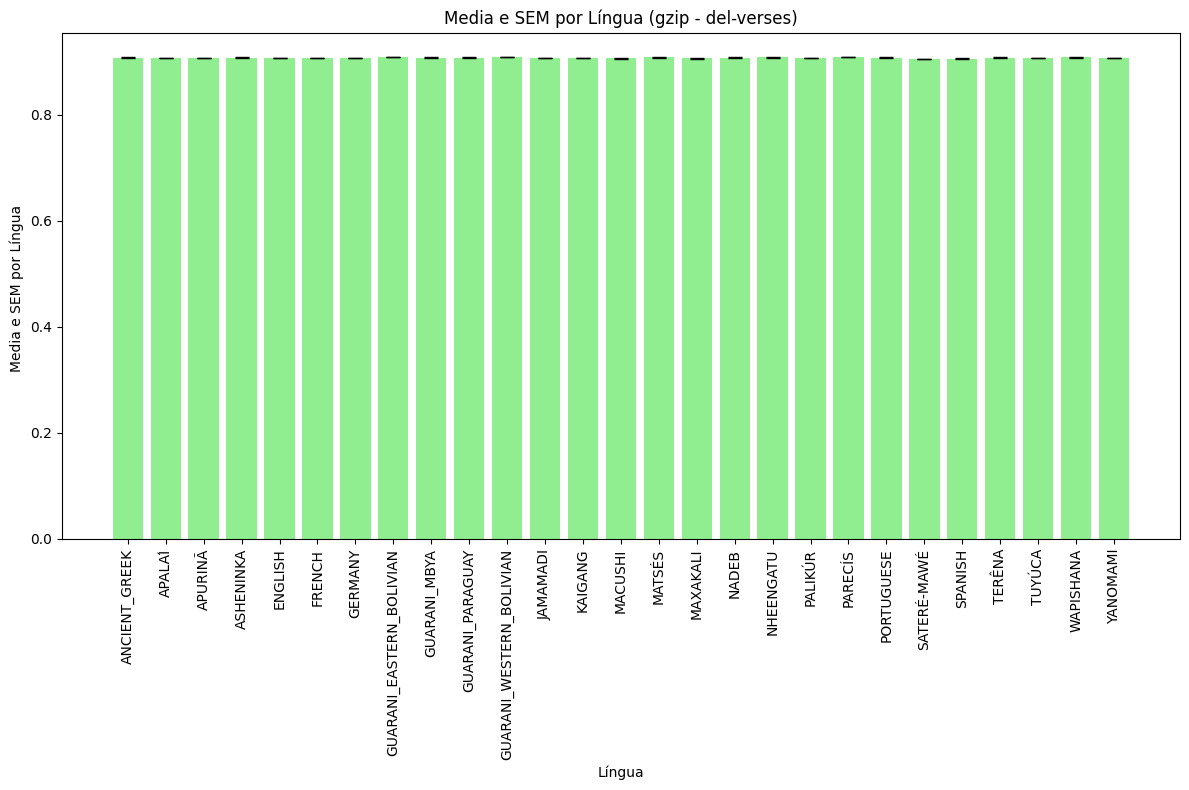

dall
Plotting gzip - del-verses para Dall


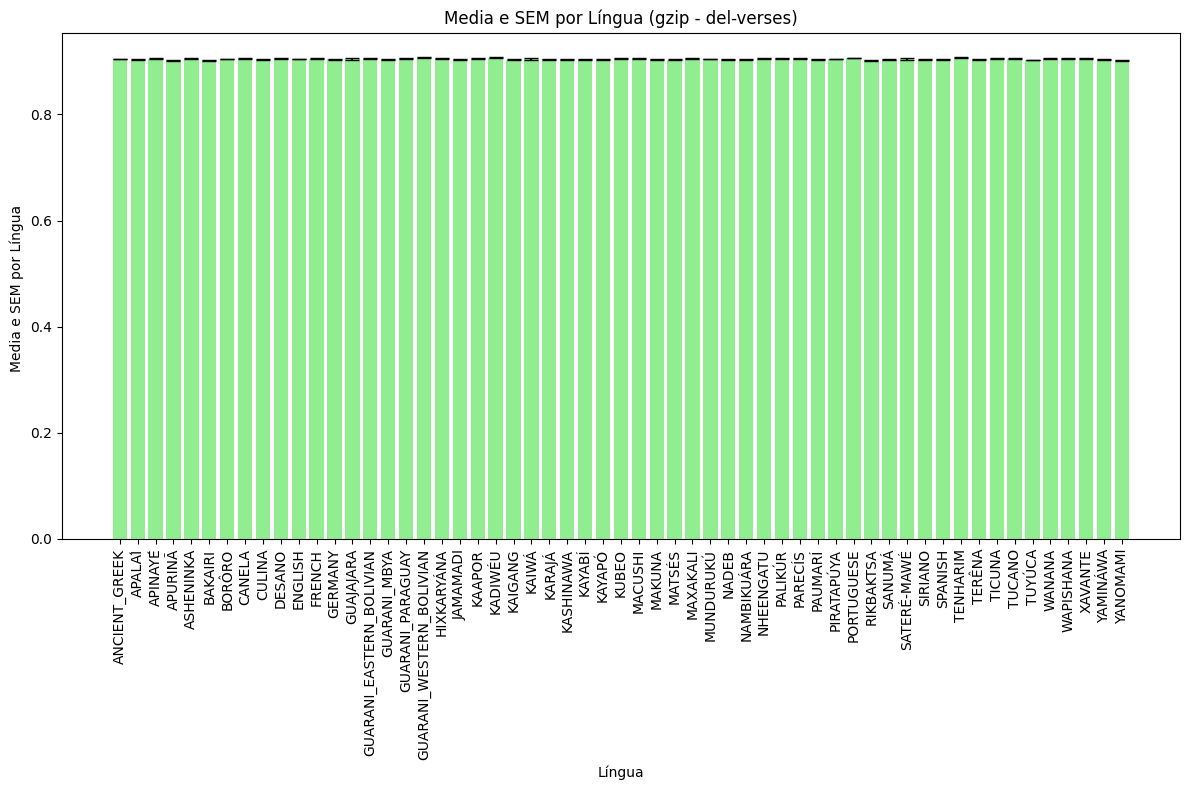

Plotting gzip - del-words para d90


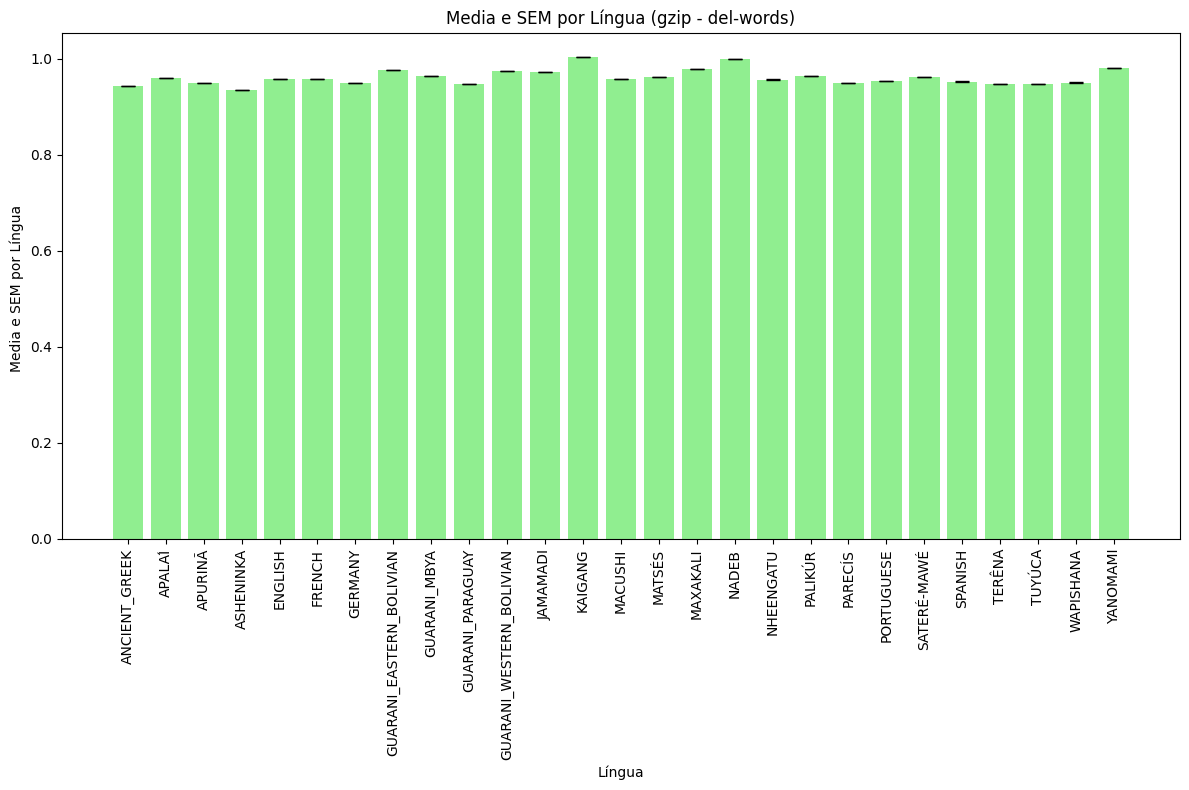

dall
Plotting gzip - del-words para Dall


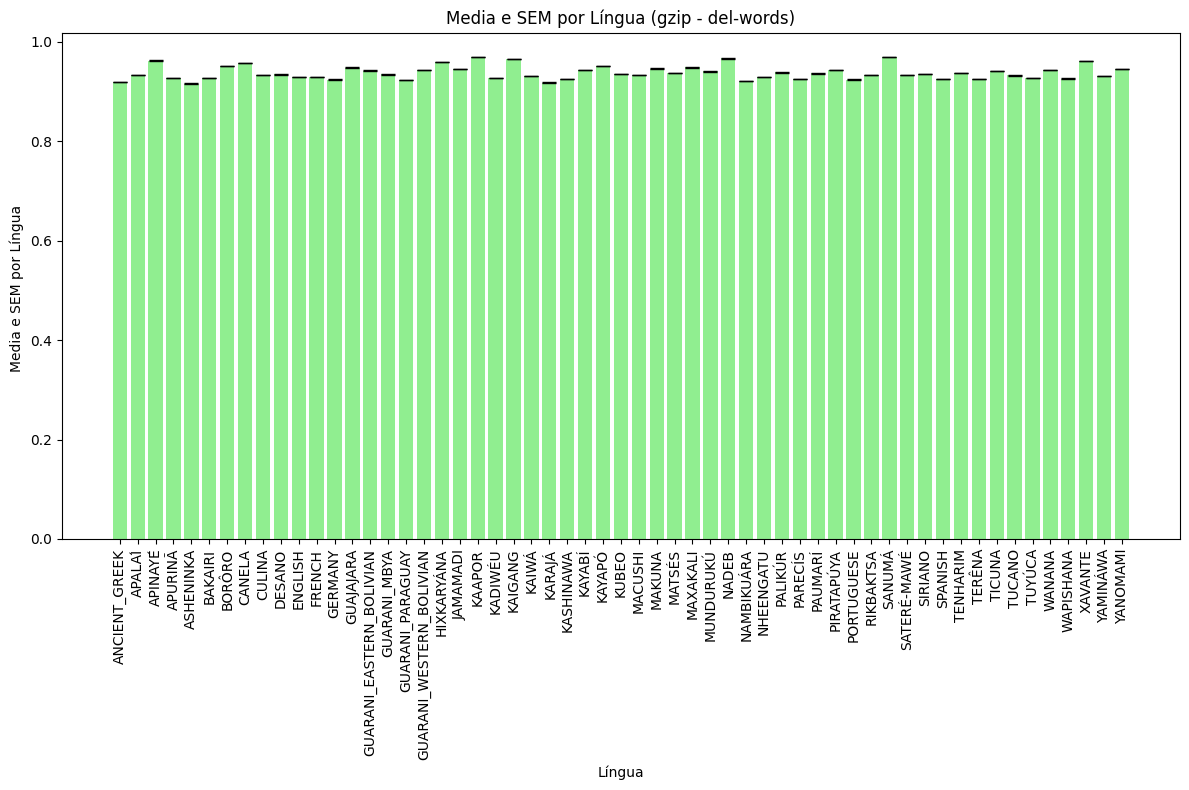

Plotting gzip - del-chars para d90


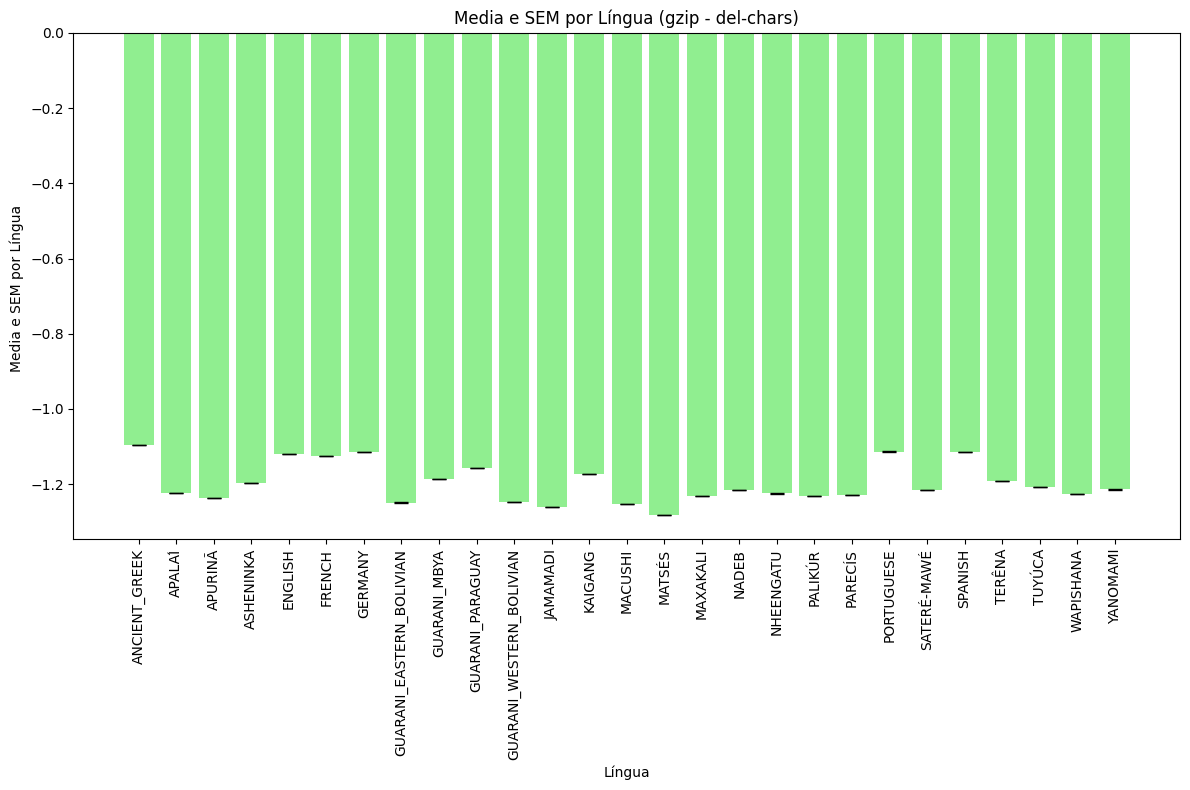

dall
Plotting gzip - del-chars para Dall


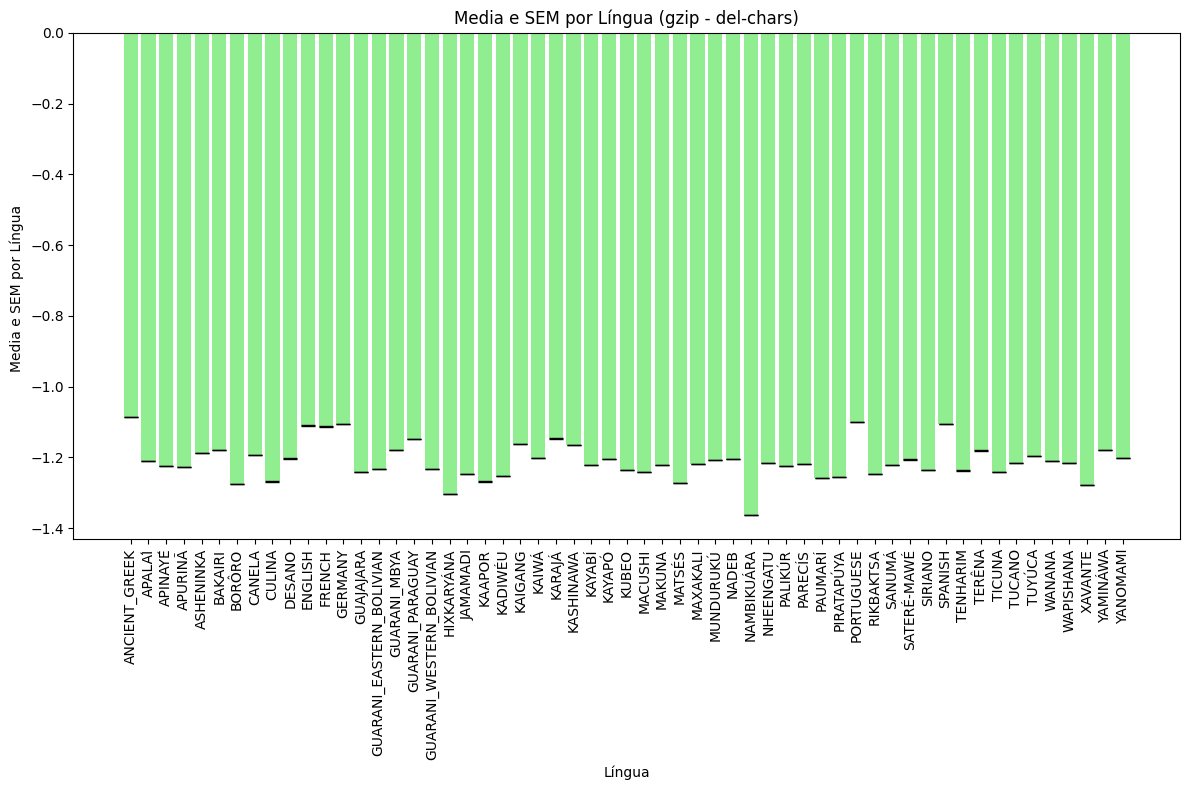

Plotting gzip - rep-words para d90


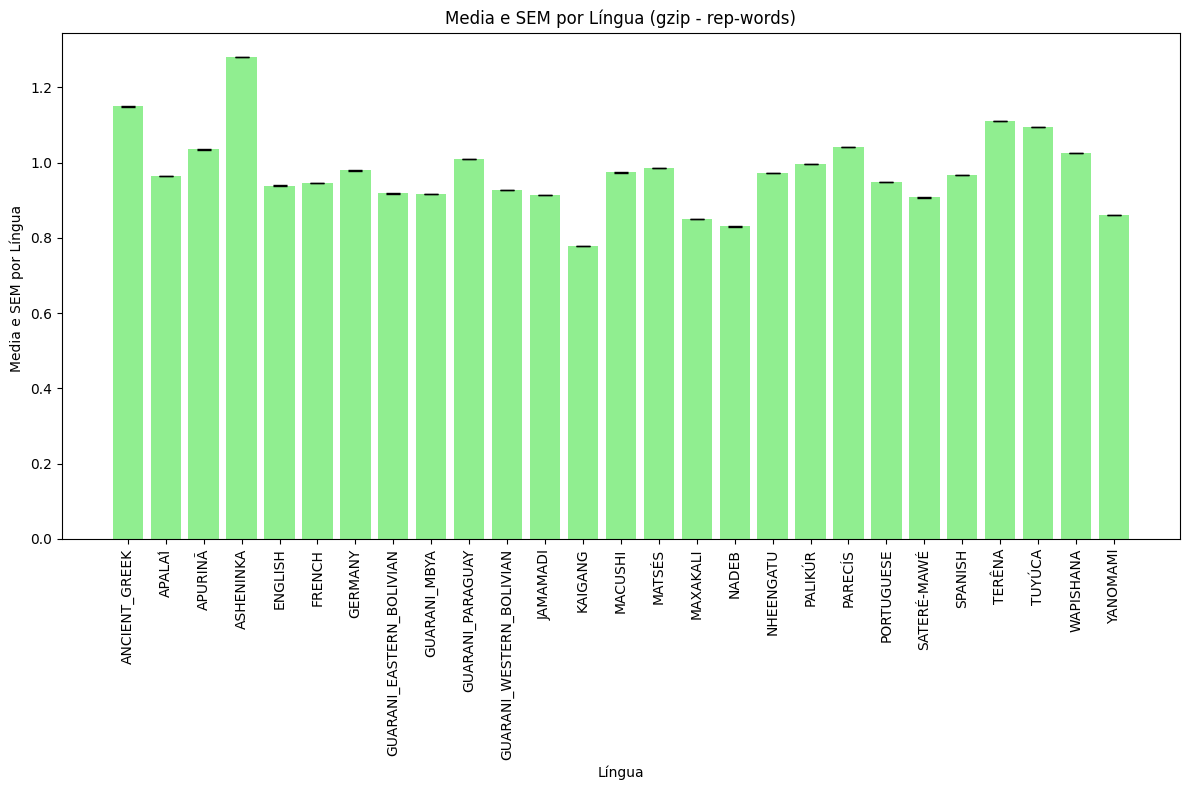

dall
Plotting gzip - rep-words para Dall


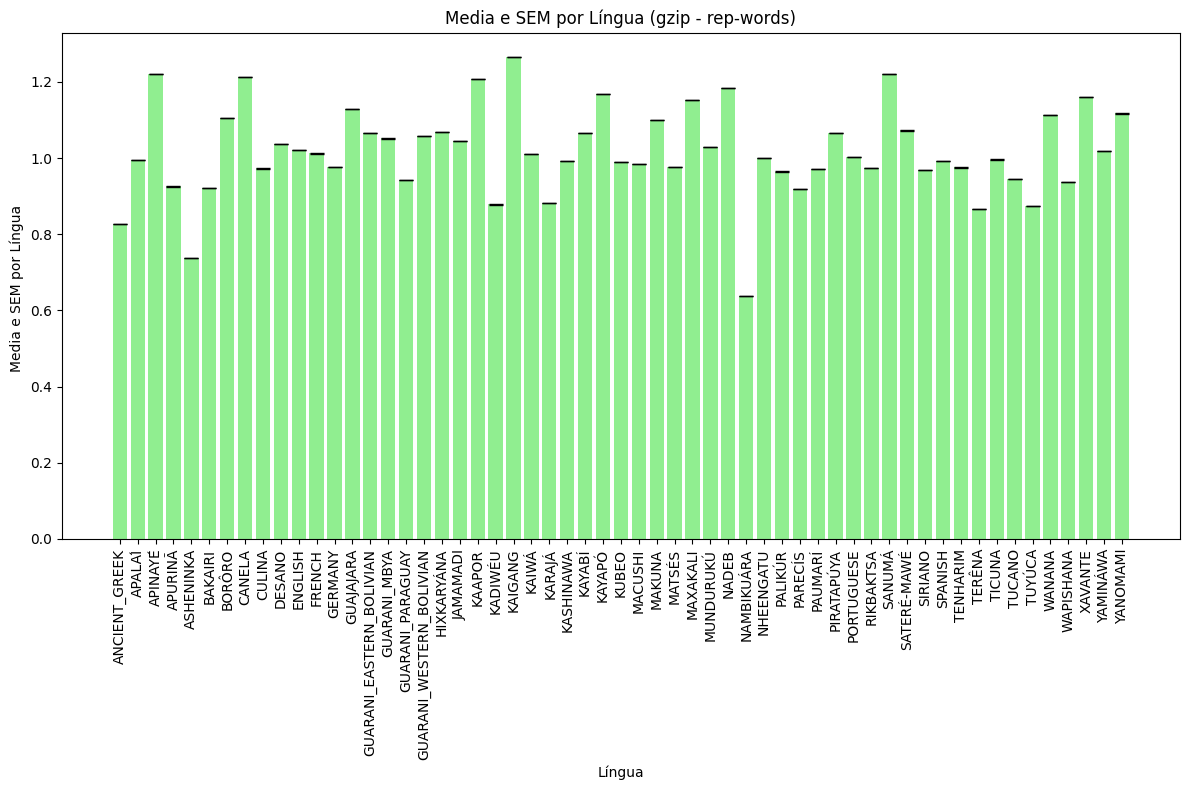

Plotting gzip - do-nothing para d90


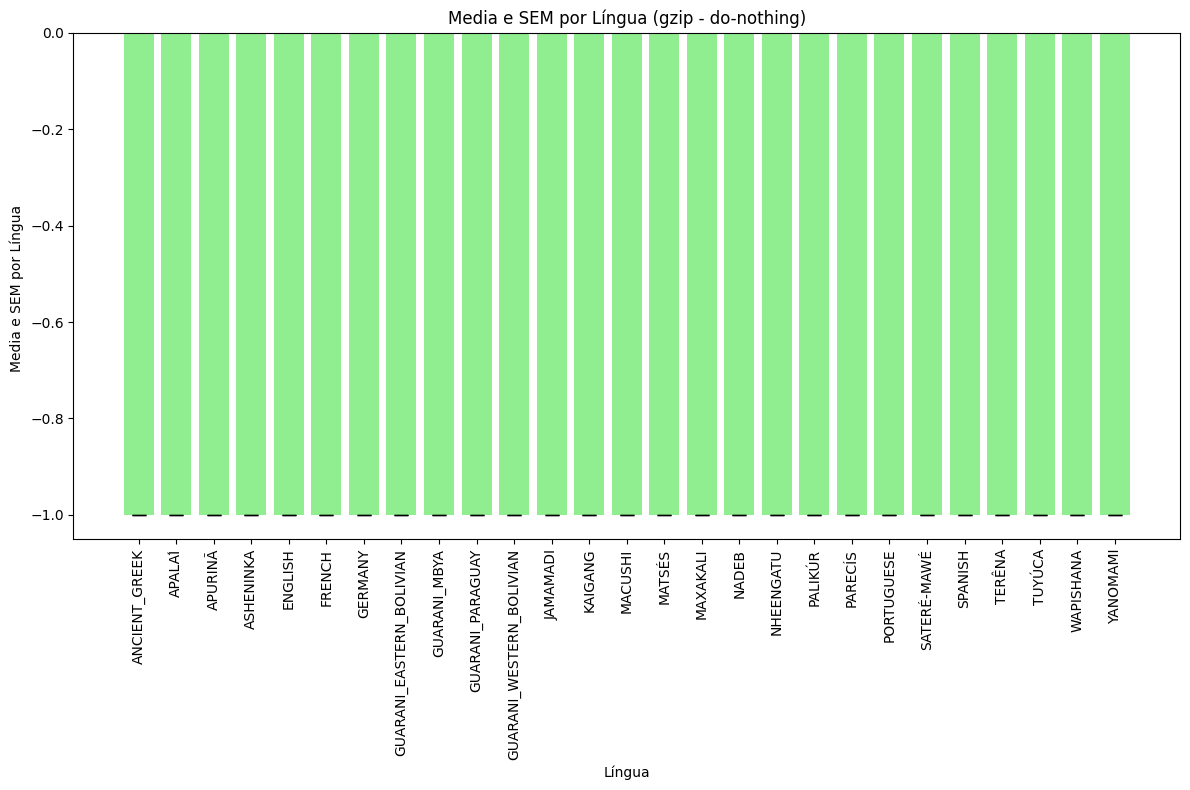

dall
Plotting gzip - do-nothing para Dall


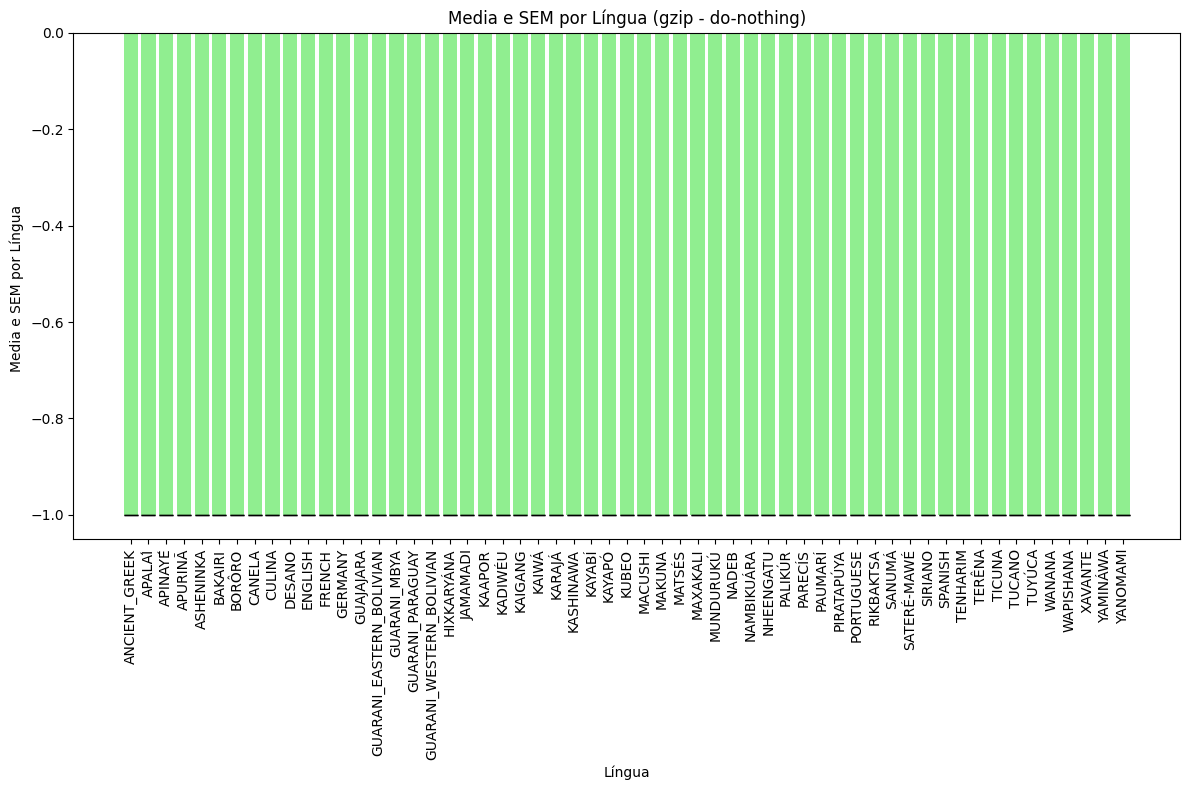

Plotting bz2 - del-verses para d90


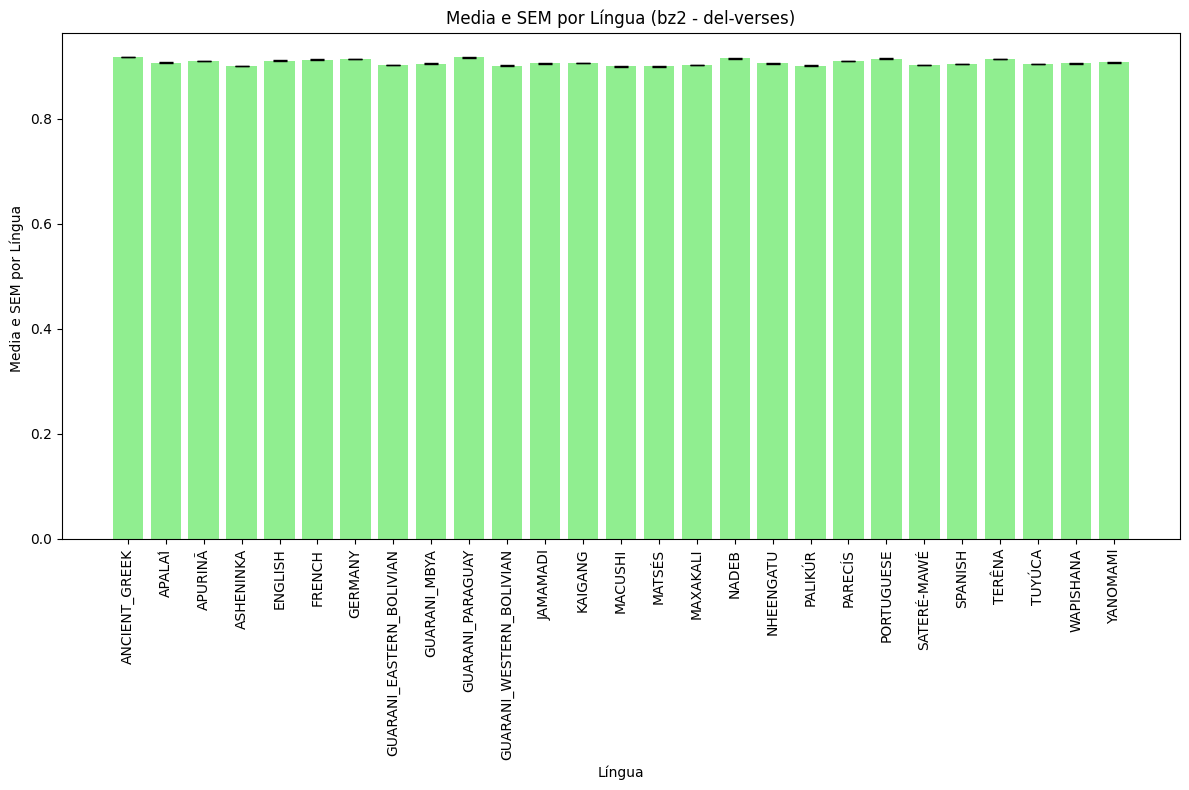

dall
Plotting bz2 - del-verses para Dall


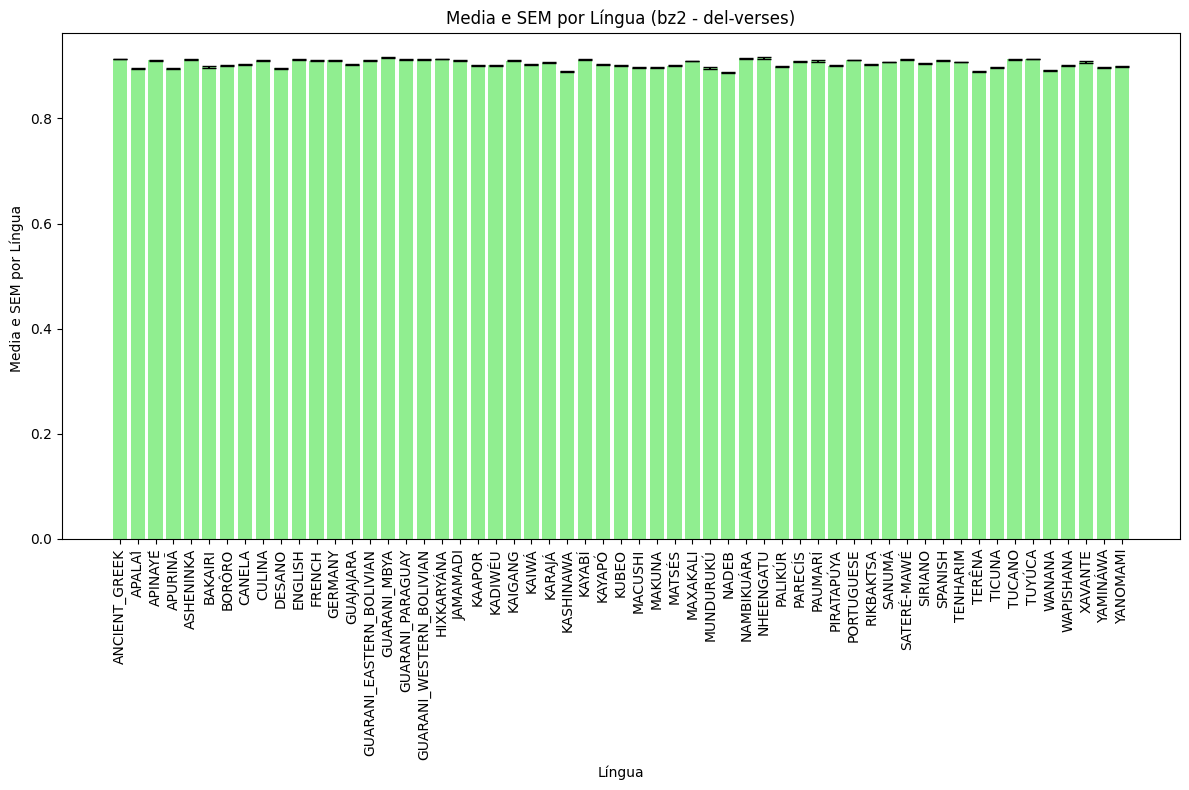

Plotting bz2 - del-words para d90


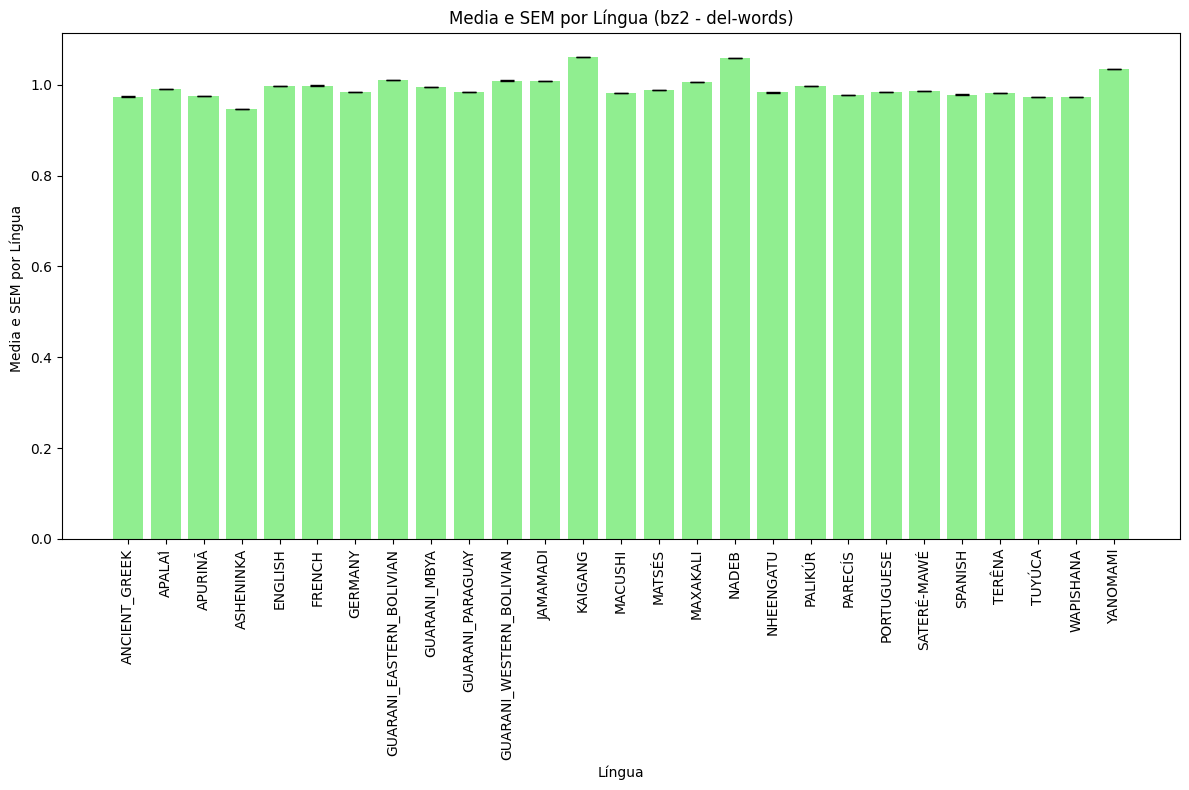

dall
Plotting bz2 - del-words para Dall


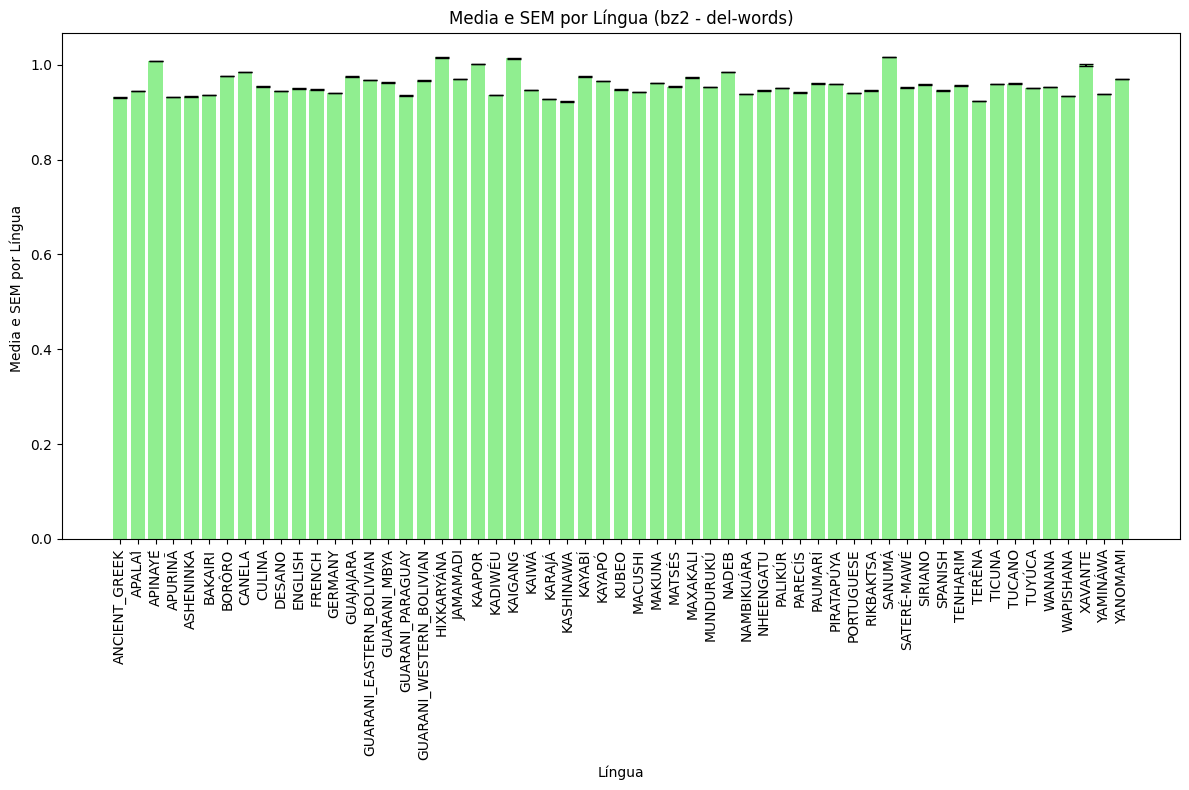

Plotting bz2 - del-chars para d90


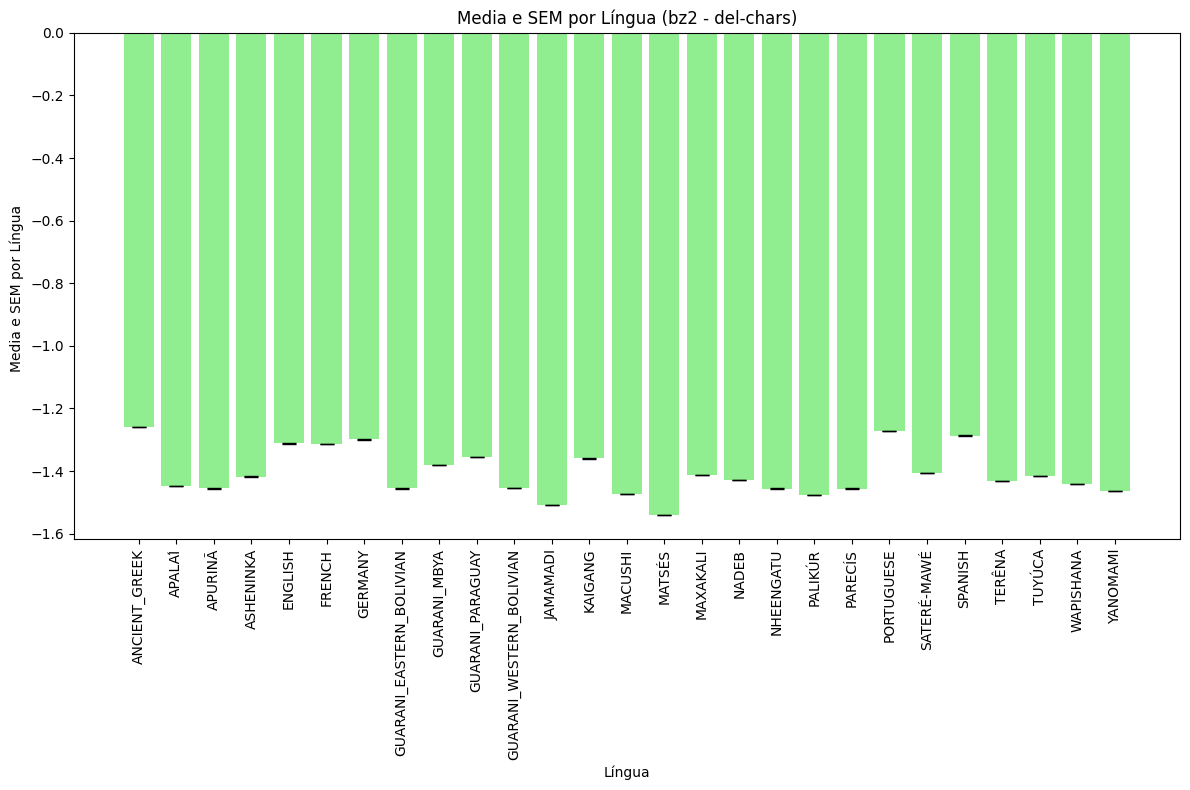

dall
Plotting bz2 - del-chars para Dall


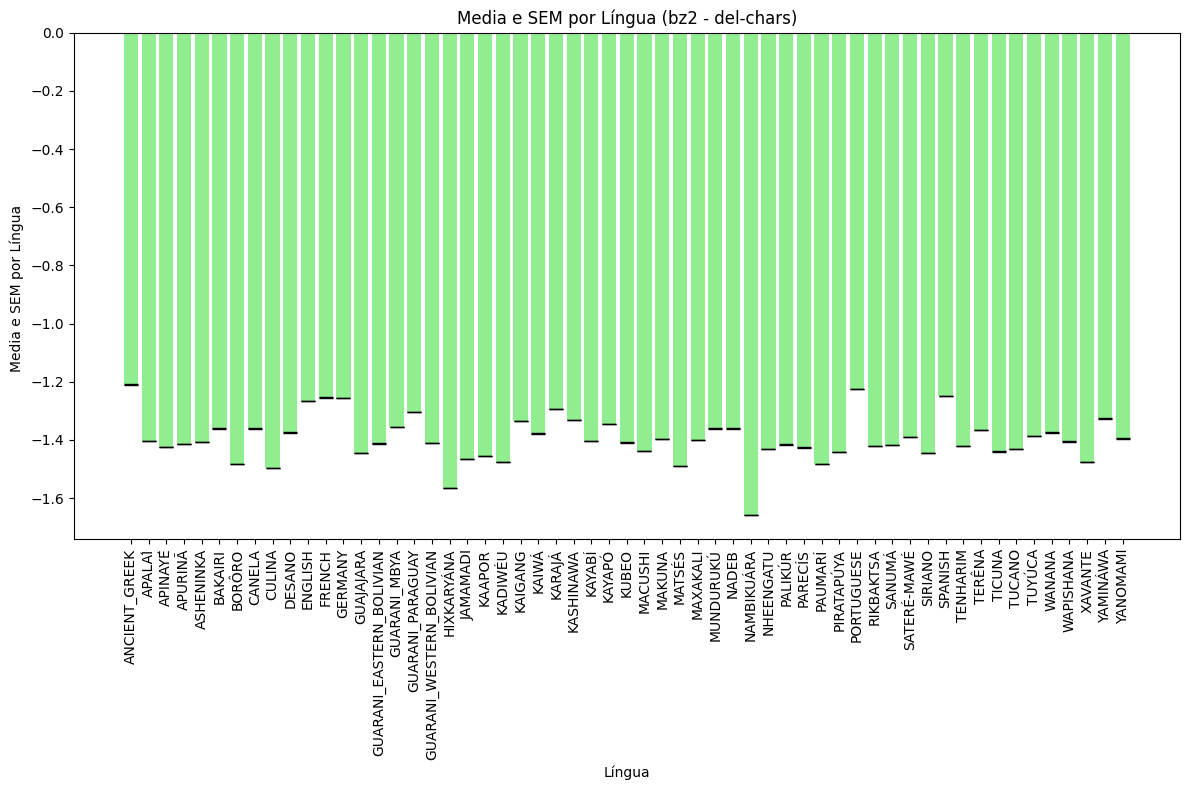

Plotting bz2 - rep-words para d90


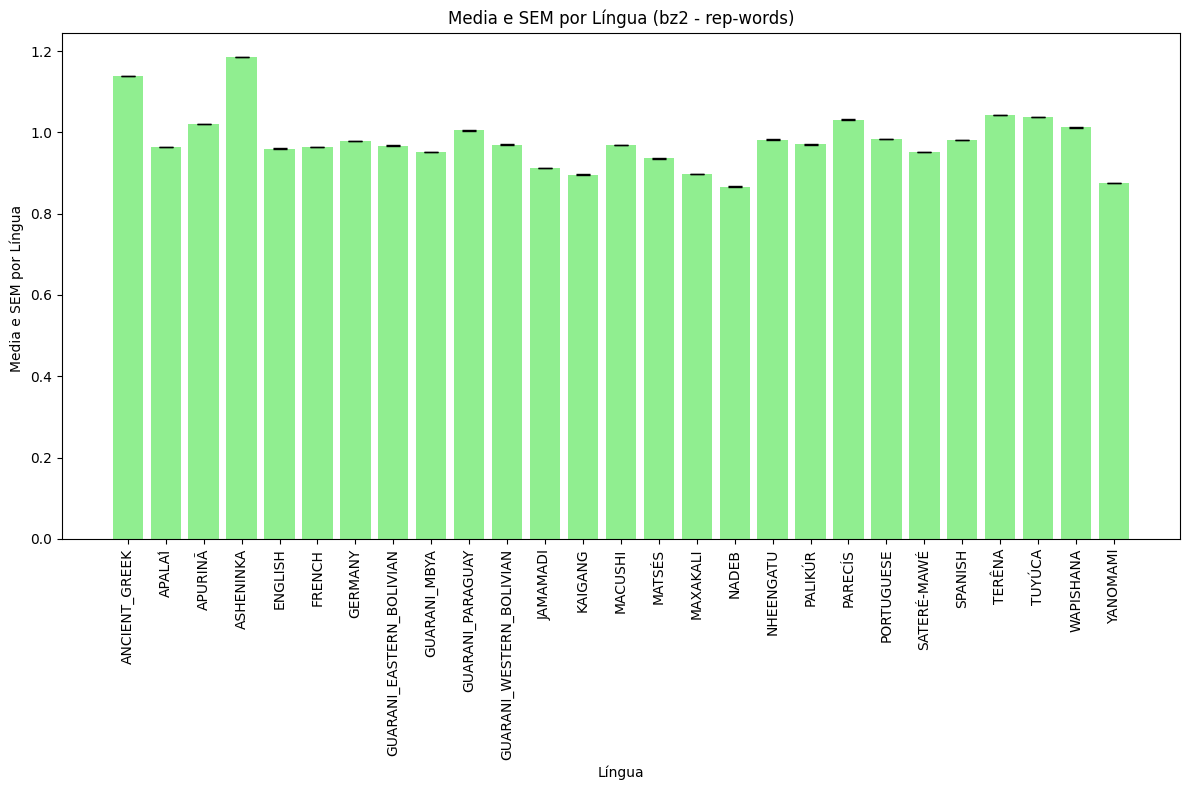

dall
Plotting bz2 - rep-words para Dall


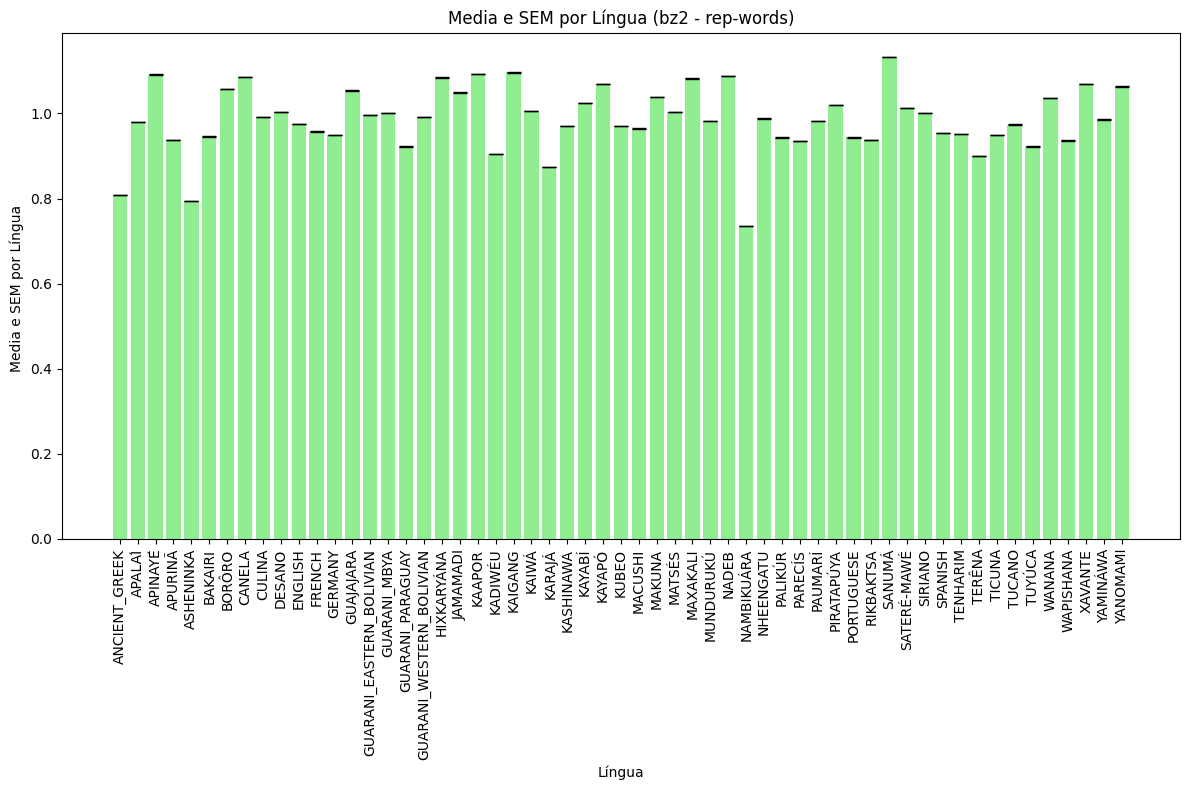

Plotting bz2 - do-nothing para d90


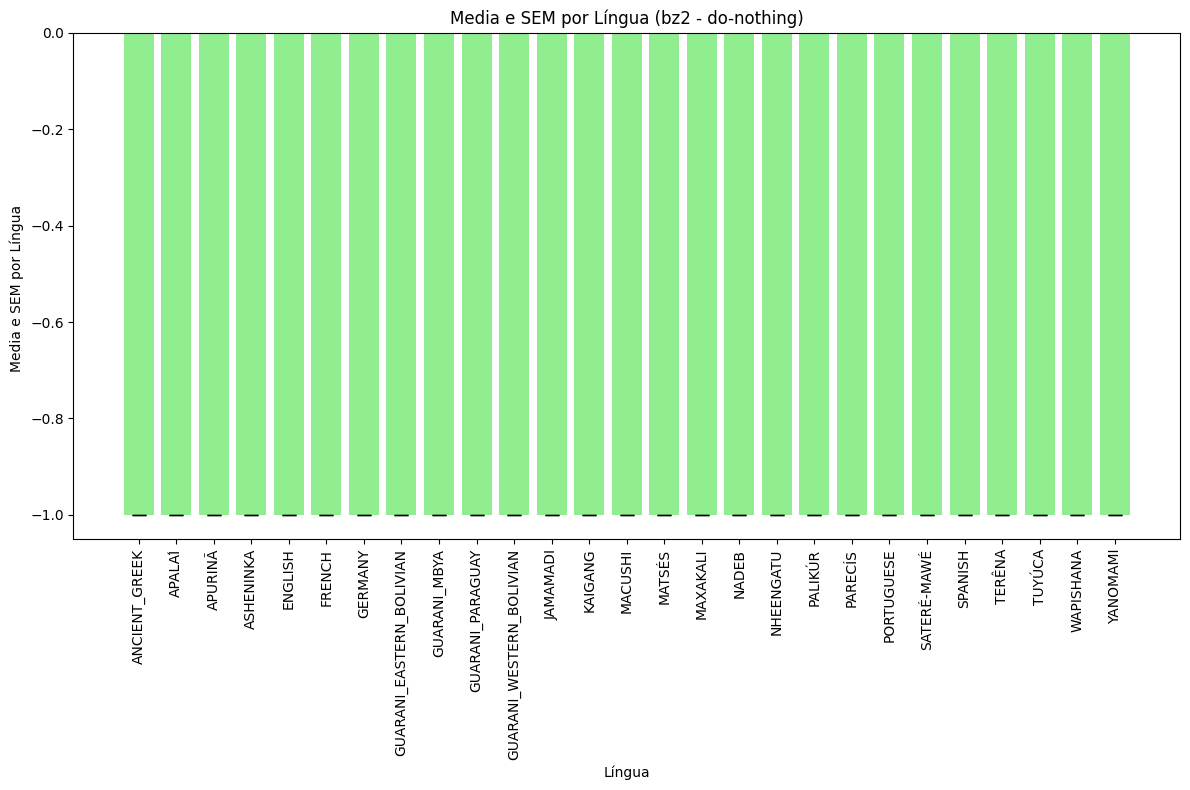

dall
Plotting bz2 - do-nothing para Dall


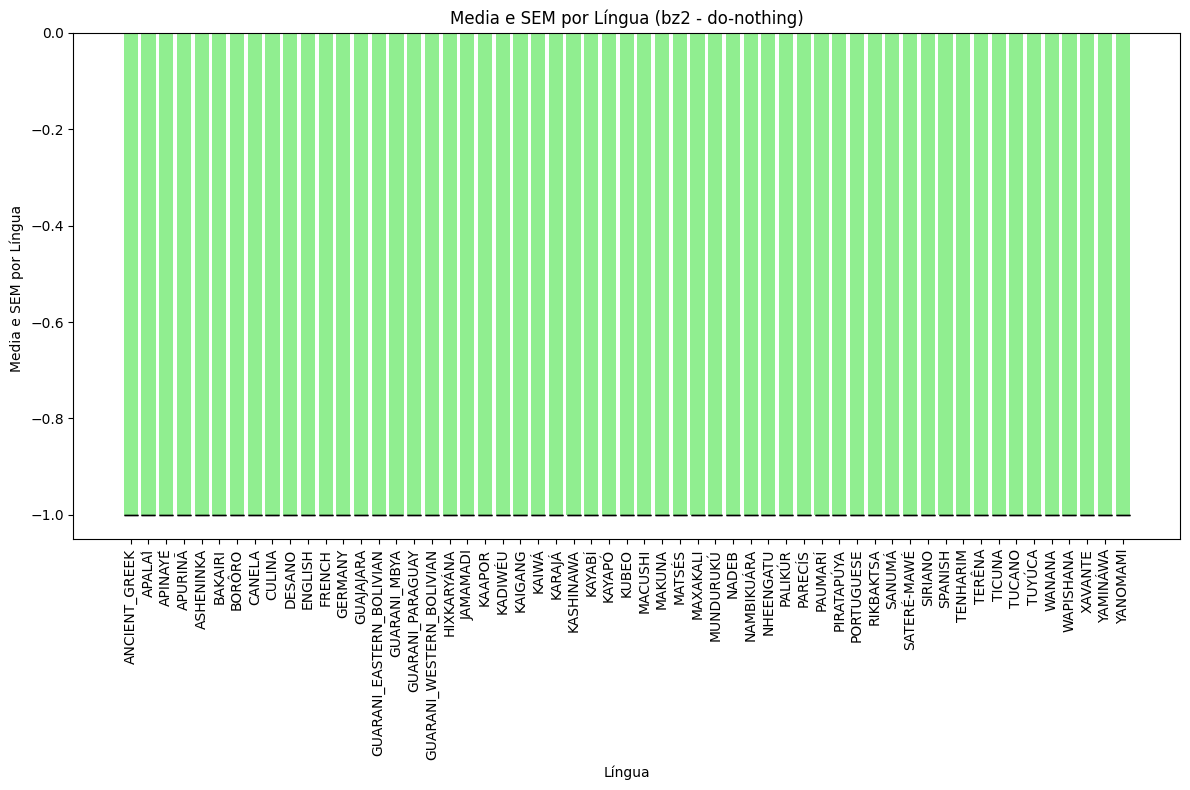

Plotting none - del-verses para d90


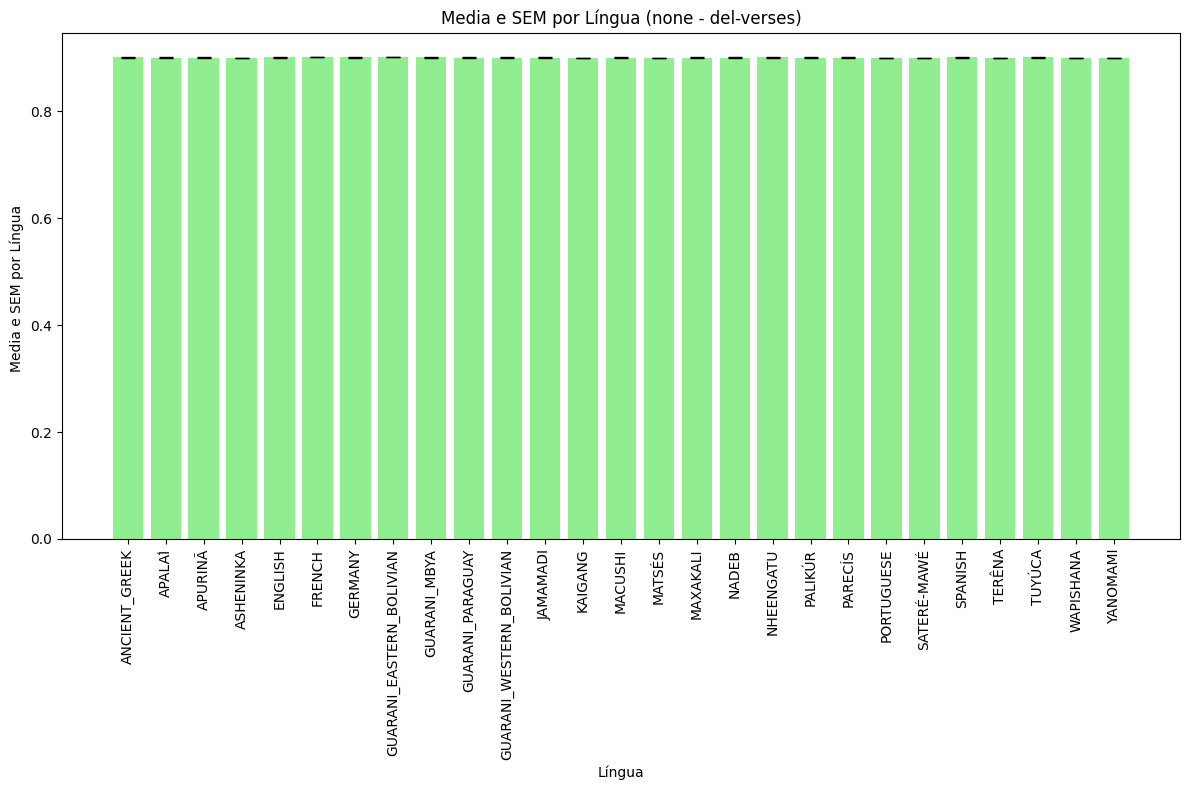

dall
Plotting none - del-verses para Dall


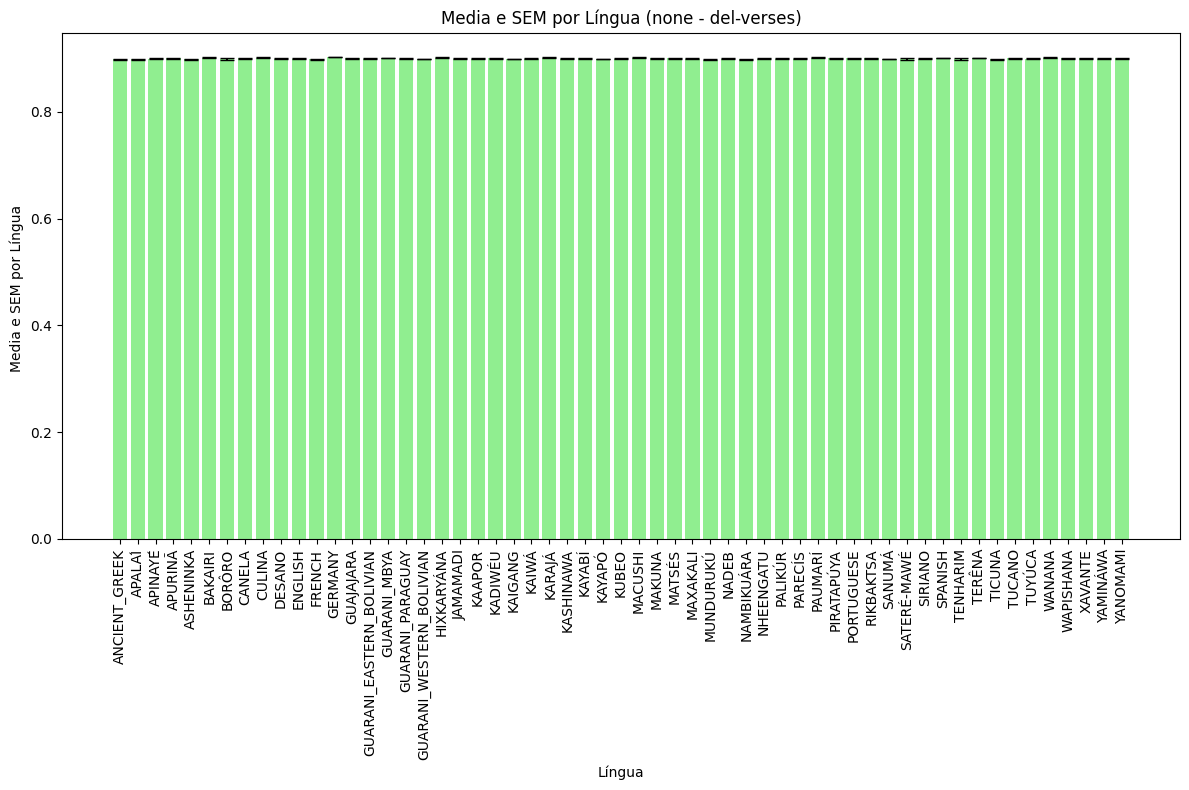

Plotting none - del-words para d90


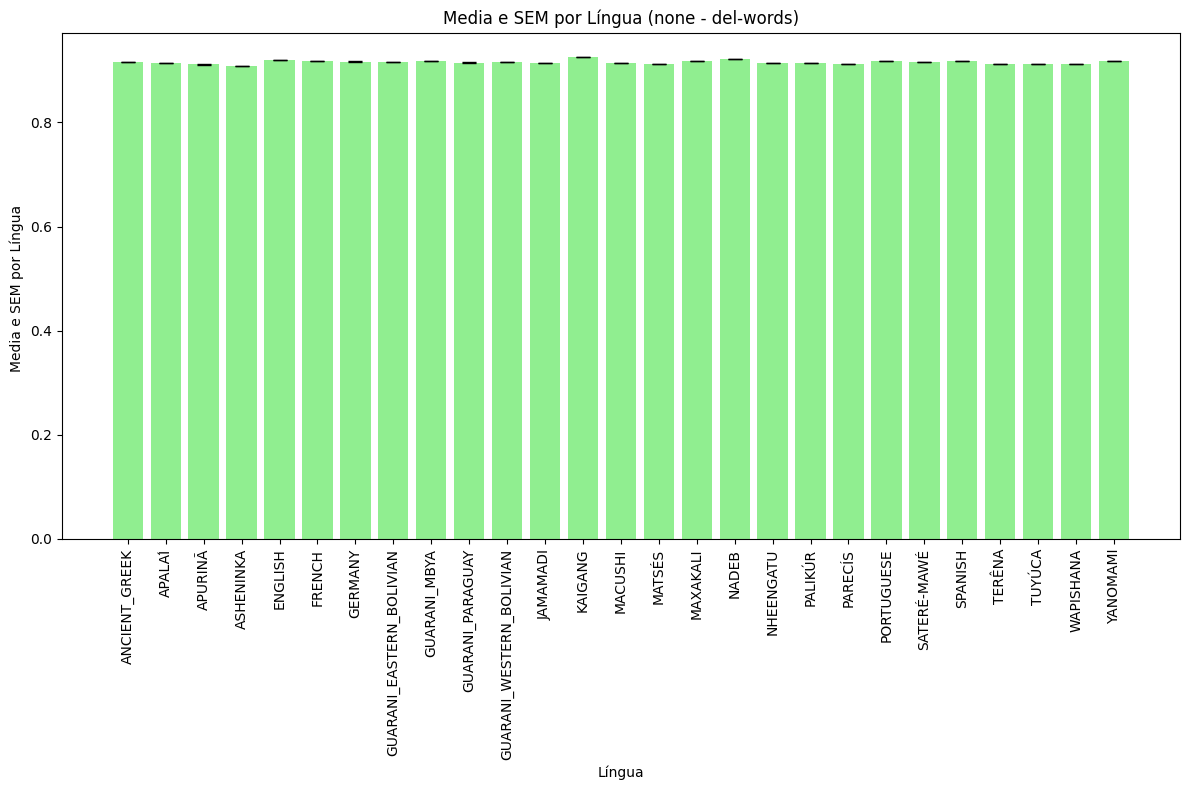

dall
Plotting none - del-words para Dall


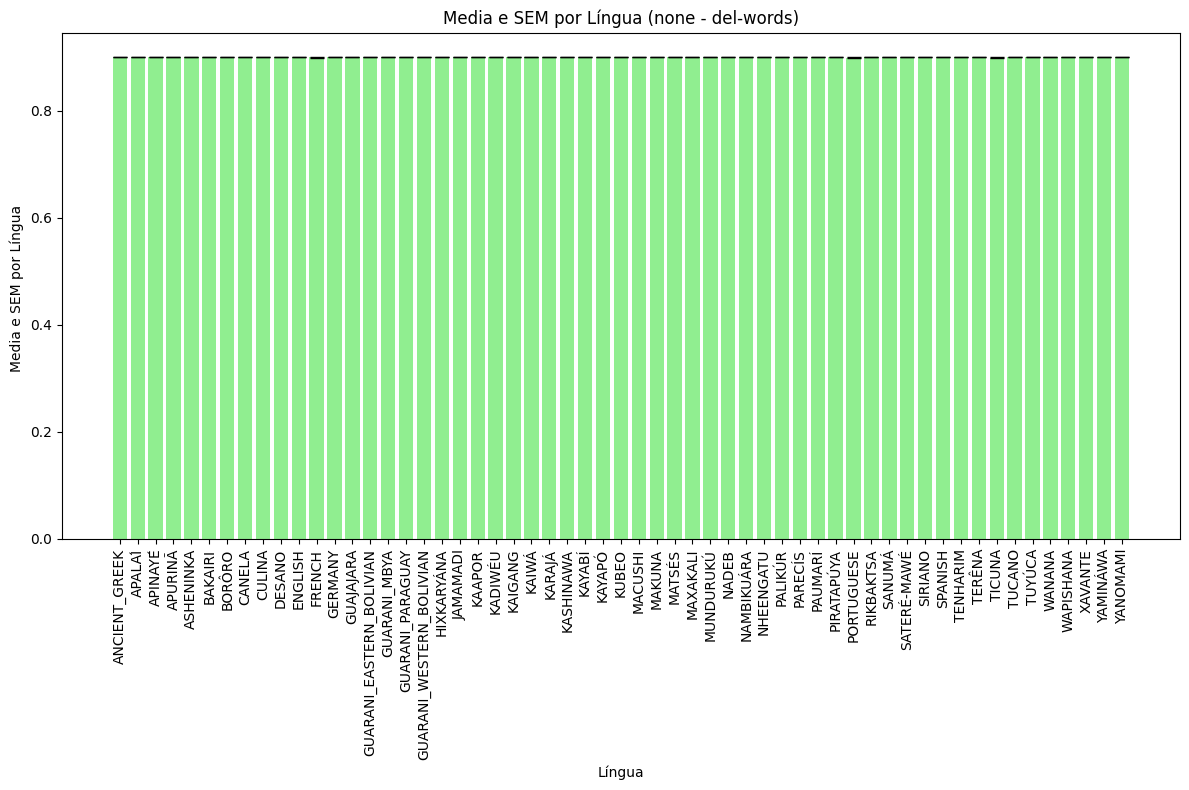

Plotting none - del-chars para d90


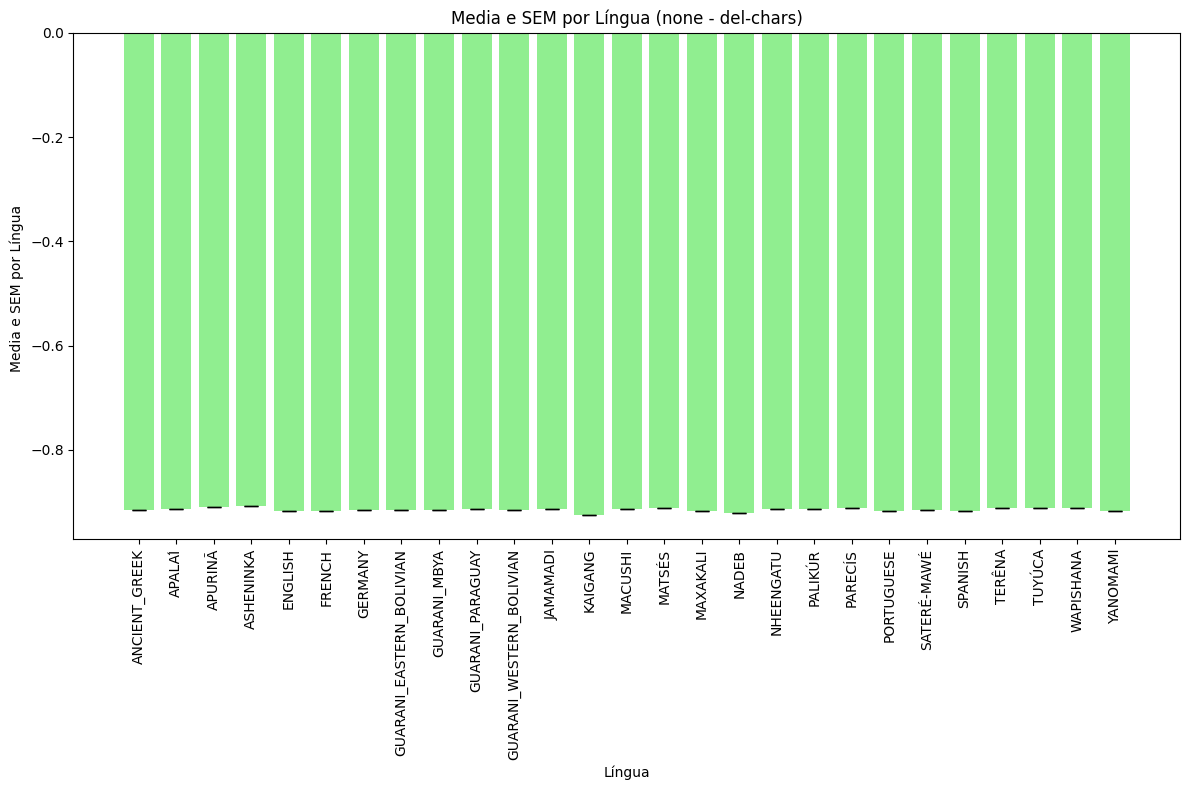

dall
Plotting none - del-chars para Dall


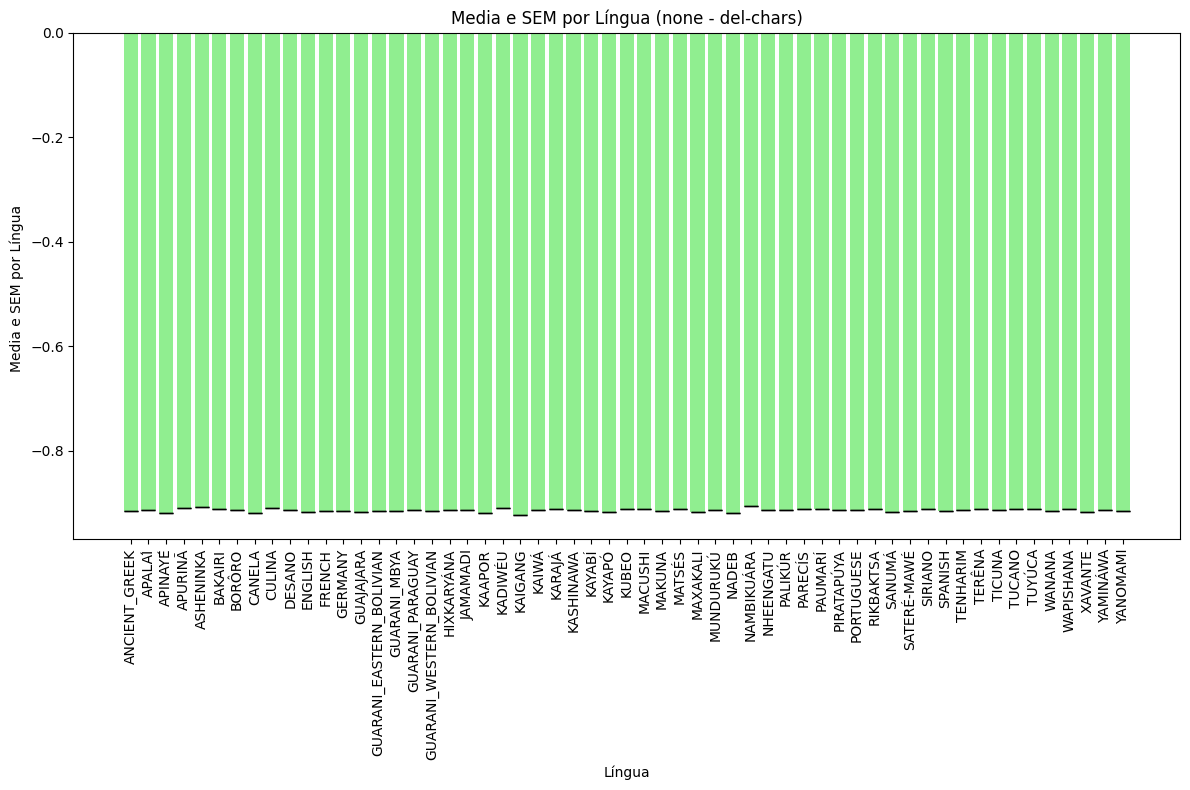

Plotting none - rep-words para d90


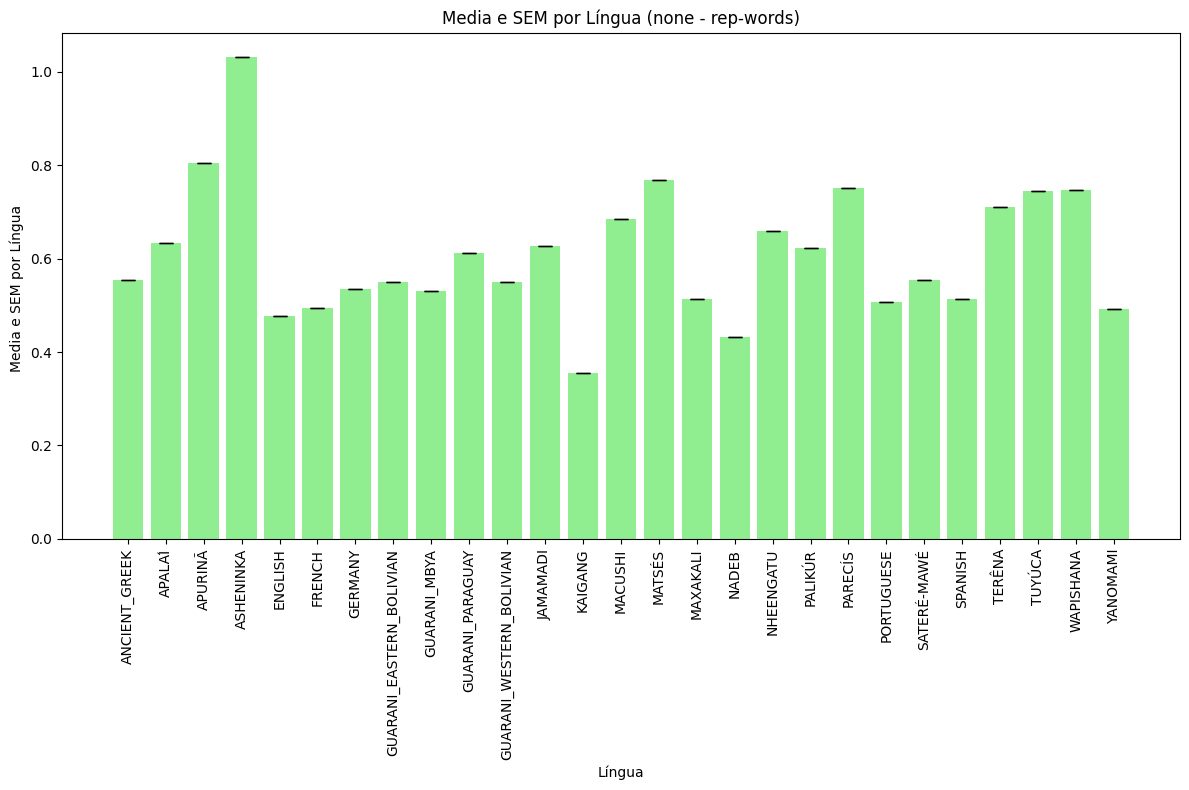

dall
Plotting none - rep-words para Dall


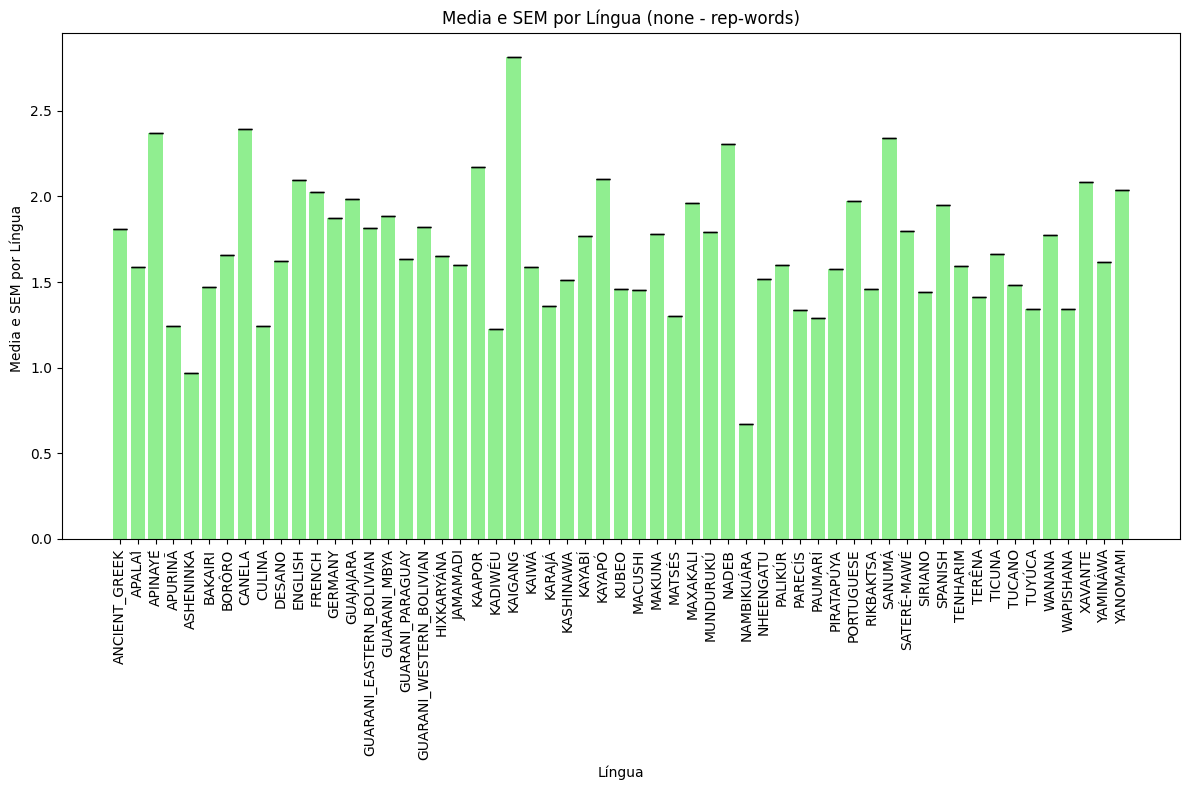

Plotting none - do-nothing para d90


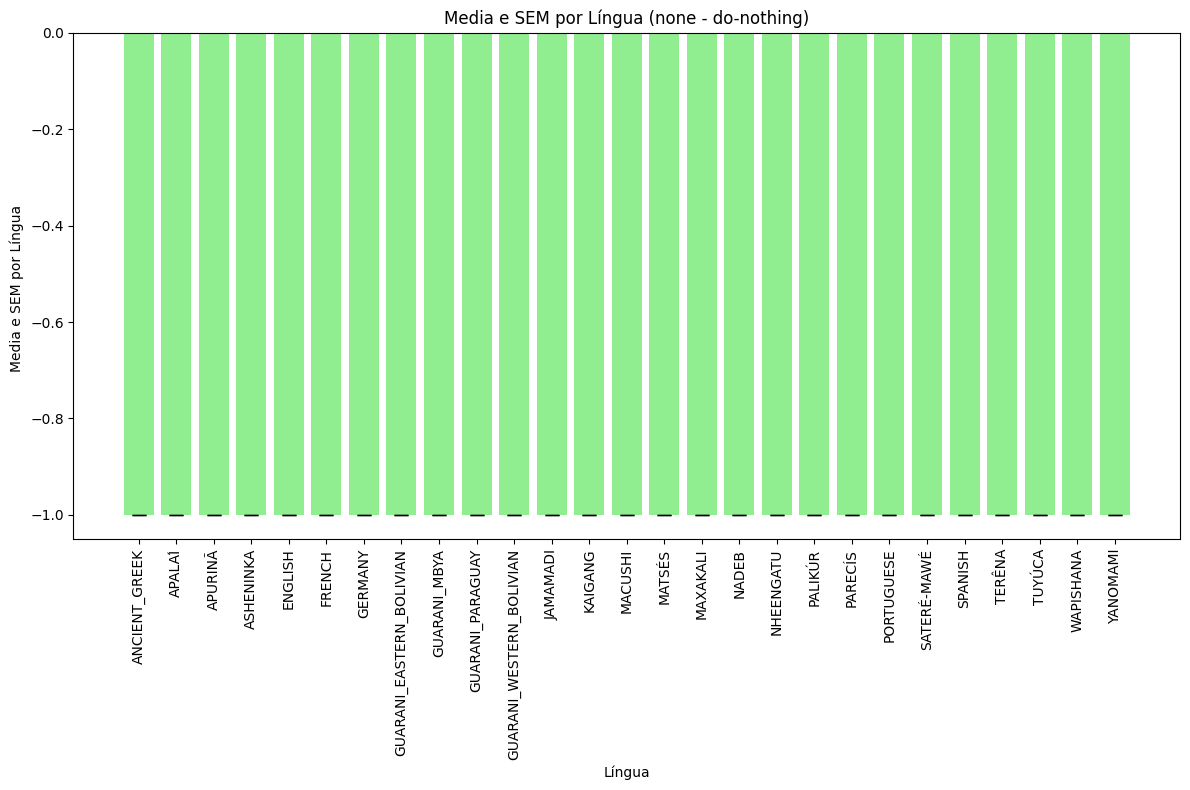

dall
Plotting none - do-nothing para Dall


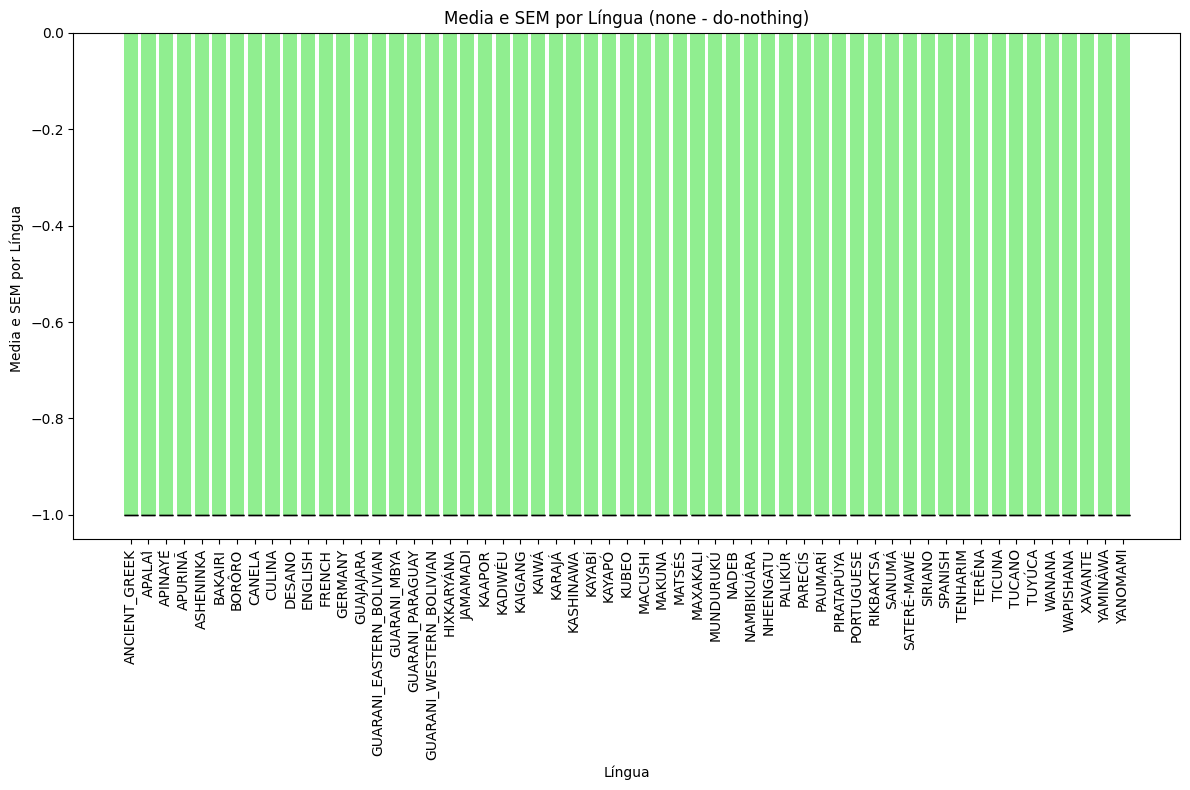

In [90]:
def plot_bar_with_error(sem_stats, algo, metric, pdf, mean_stats):
    
    df_algo_metric = sem_stats[(sem_stats['algorithm'] == algo) & (sem_stats['metric'] == metric)]
    df_filter = mean_stats[(mean_stats['algorithm'] == algo) & (mean_stats['metric'] == metric)]
    
    plt.figure(figsize=(12, 8))
    plt.bar(df_algo_metric['language'], df_filter['mean'], color='lightgreen', yerr=df_algo_metric['sem'], capsize=5)
    plt.xticks(rotation=90)
    plt.xlabel('Língua')
    plt.ylabel('Media e SEM por Língua ')
    plt.title(f'Media e SEM por Língua ({algo} - {metric})')
    plt.tight_layout()
    pdf.savefig() 
    plt.show()
    plt.close()

selected_algorithms = df90['algorithm'].unique()# Substitua pelos algoritmos desejados
selected_metrics = df90['metric'].unique()  # Substitua pelas métricas desejadas    

with PdfPages('../images/h3_bar_with_error.pdf') as pdf:
    for algo in selected_algorithms:
        for metric in selected_metrics:
            print(f"Plotting {algo} - {metric} para d90")
            plot_bar_with_error(sem_90, algo, metric, pdf, mean_90)
            
            print("dall")
            print(f"Plotting {algo} - {metric} para Dall")
            plot_bar_with_error(sem_all, algo, metric, pdf, mean_all)

Plotting gzip - del-verses for d90


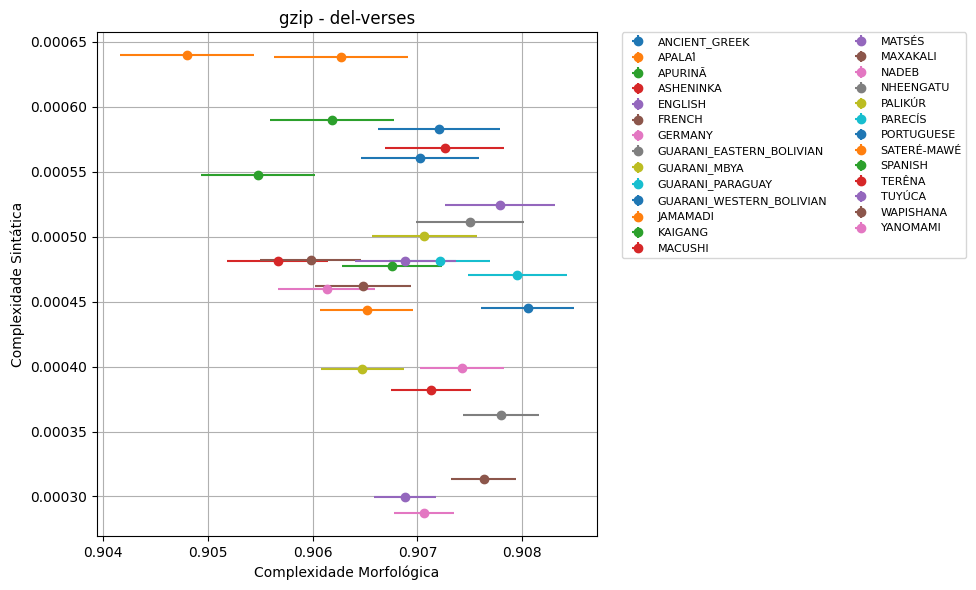

Plotting gzip - del-verses for Dall


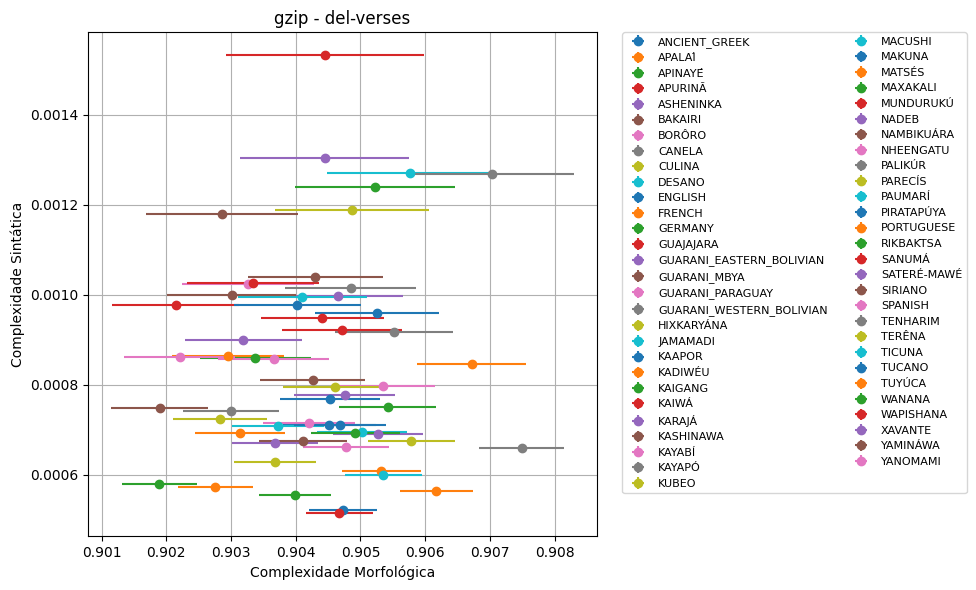

Plotting gzip - del-words for d90


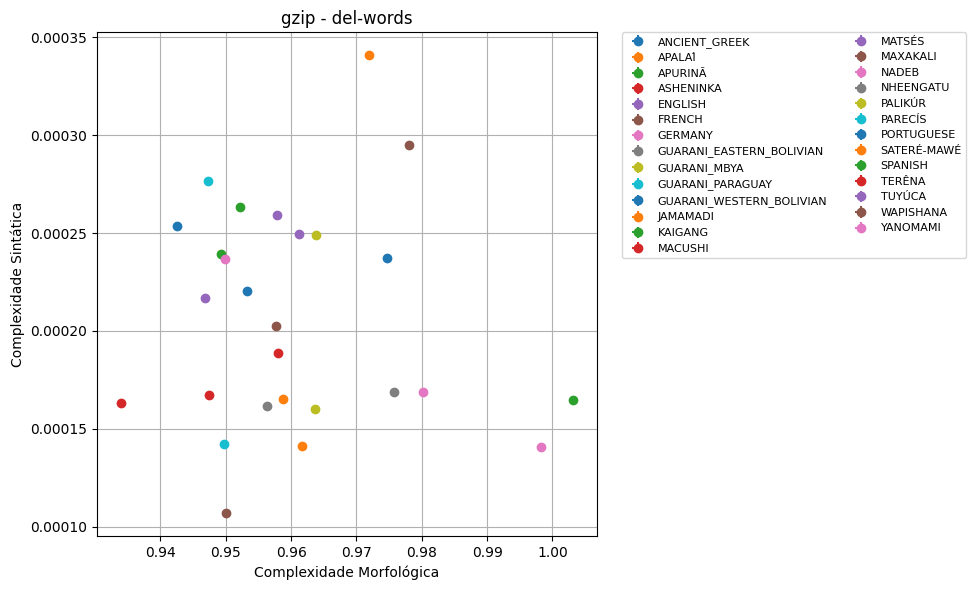

Plotting gzip - del-words for Dall


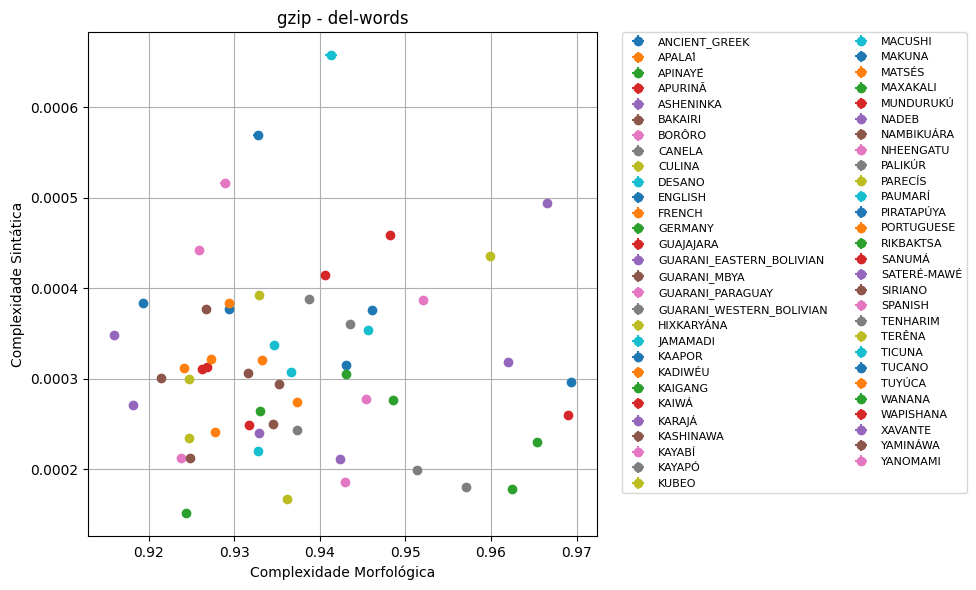

Plotting gzip - del-chars for d90


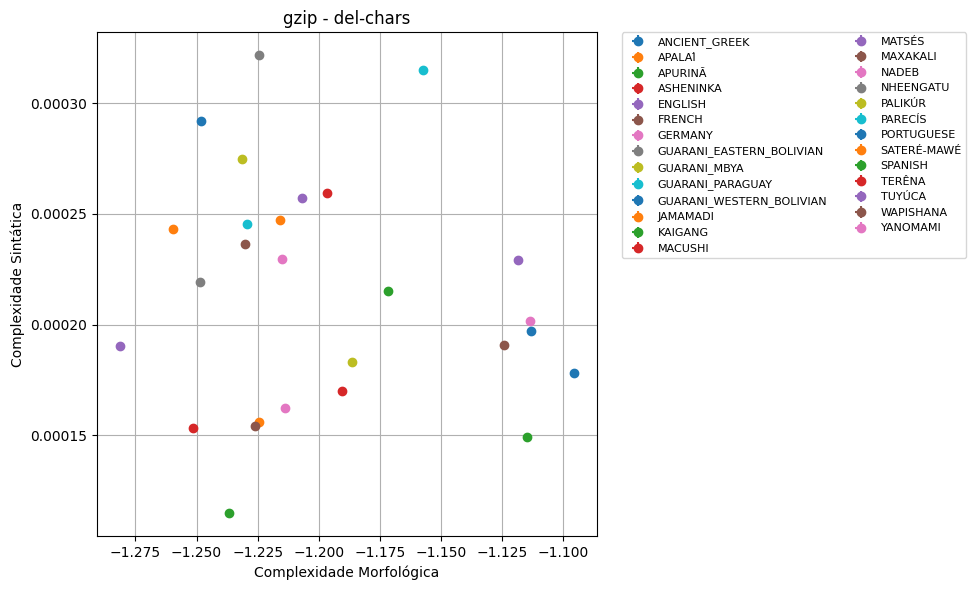

Plotting gzip - del-chars for Dall


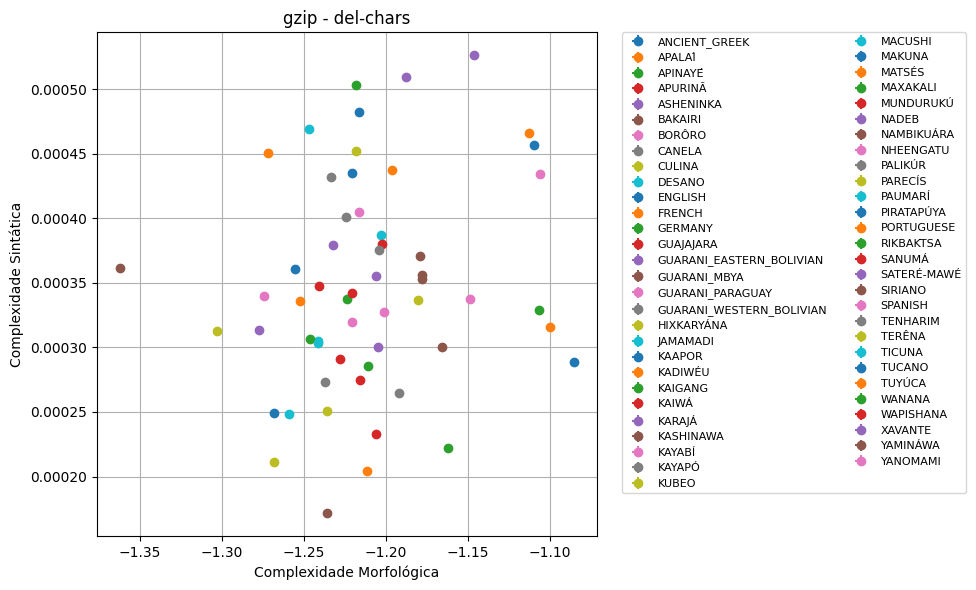

Plotting gzip - rep-words for d90


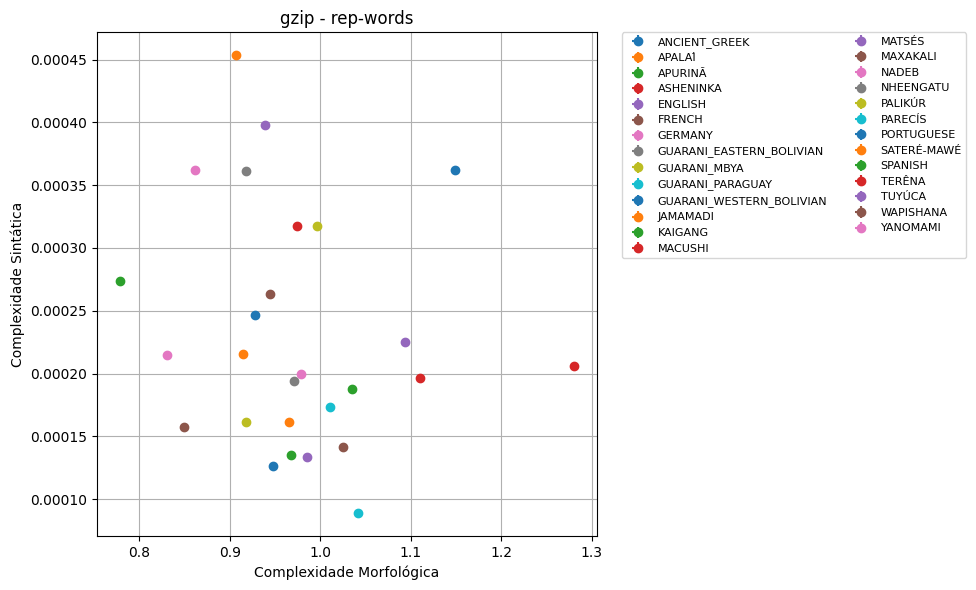

Plotting gzip - rep-words for Dall


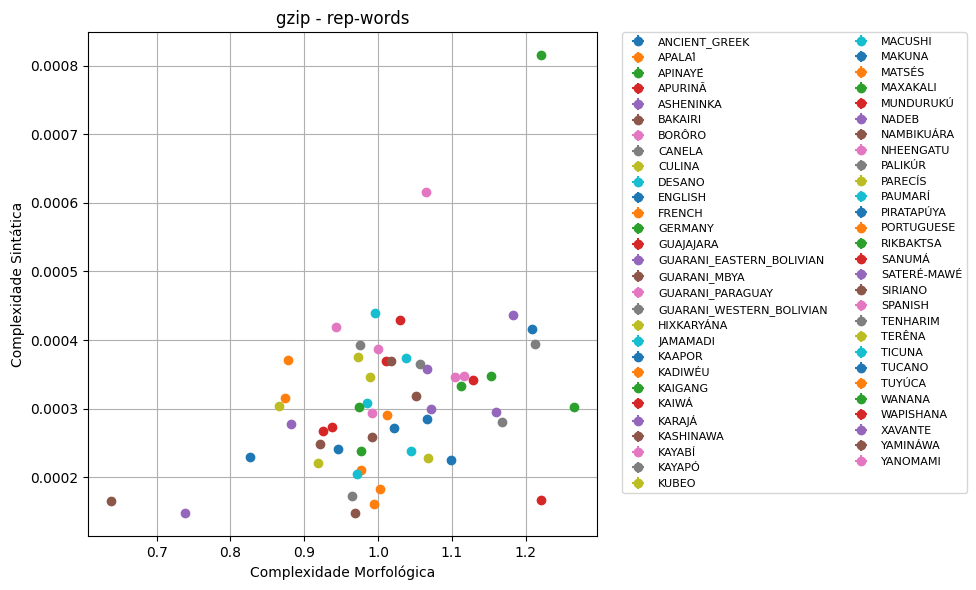

Plotting gzip - do-nothing for d90


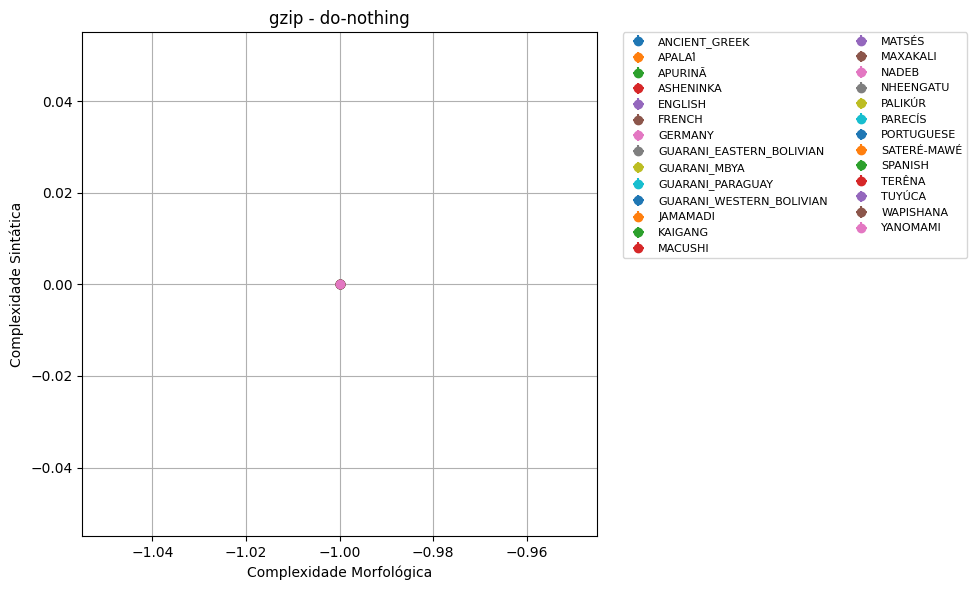

Plotting gzip - do-nothing for Dall


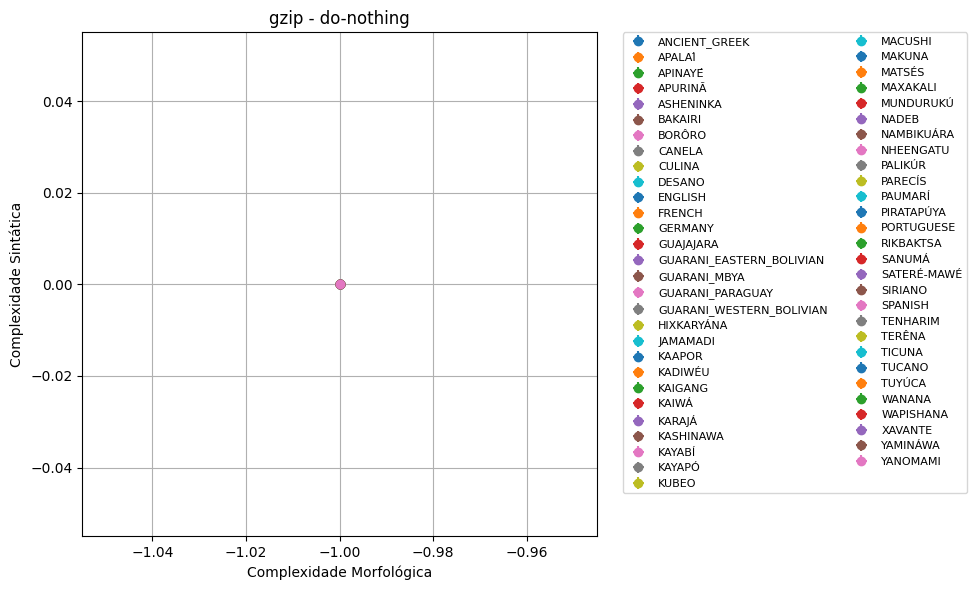

Plotting bz2 - del-verses for d90


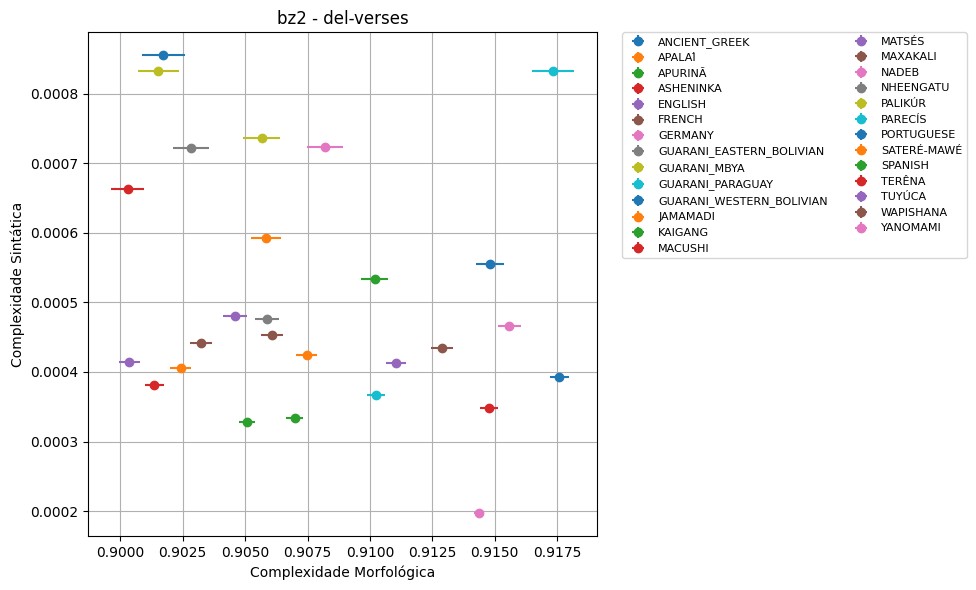

Plotting bz2 - del-verses for Dall


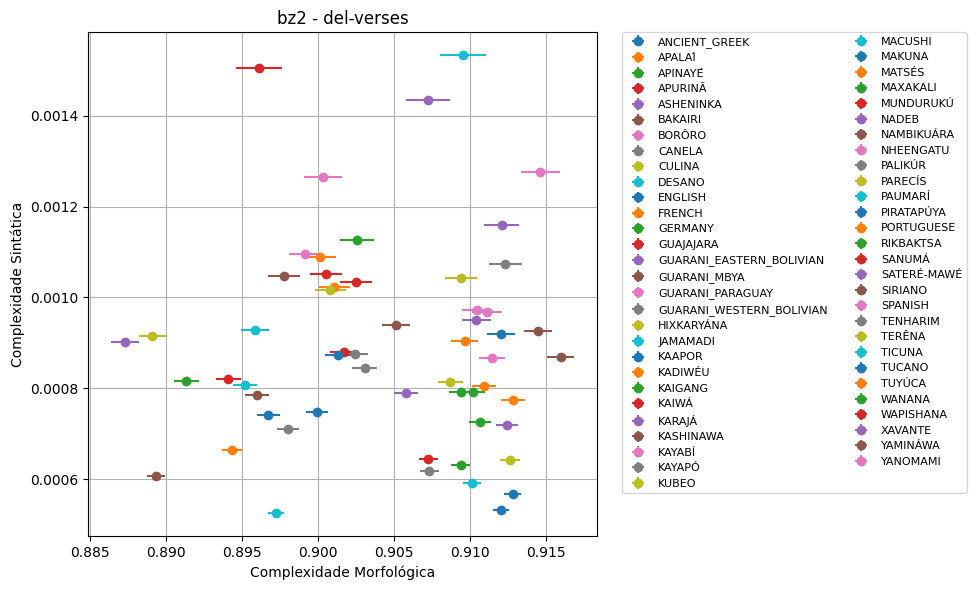

Plotting bz2 - del-words for d90


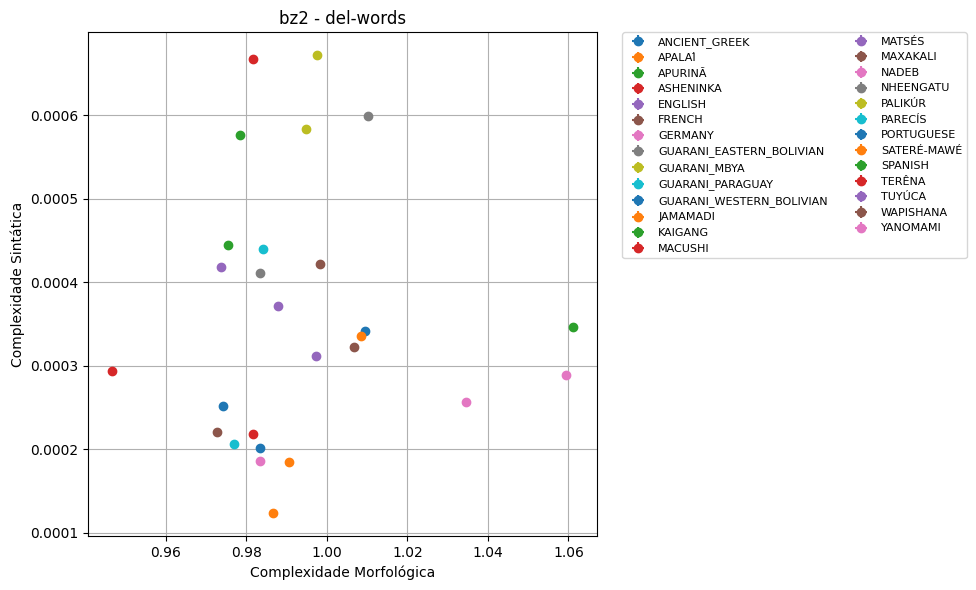

Plotting bz2 - del-words for Dall


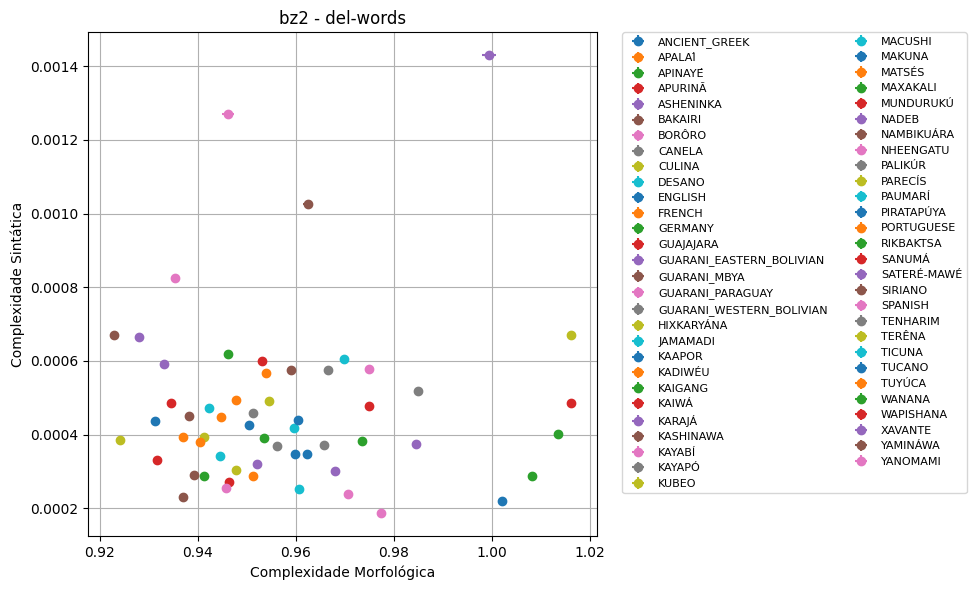

Plotting bz2 - del-chars for d90


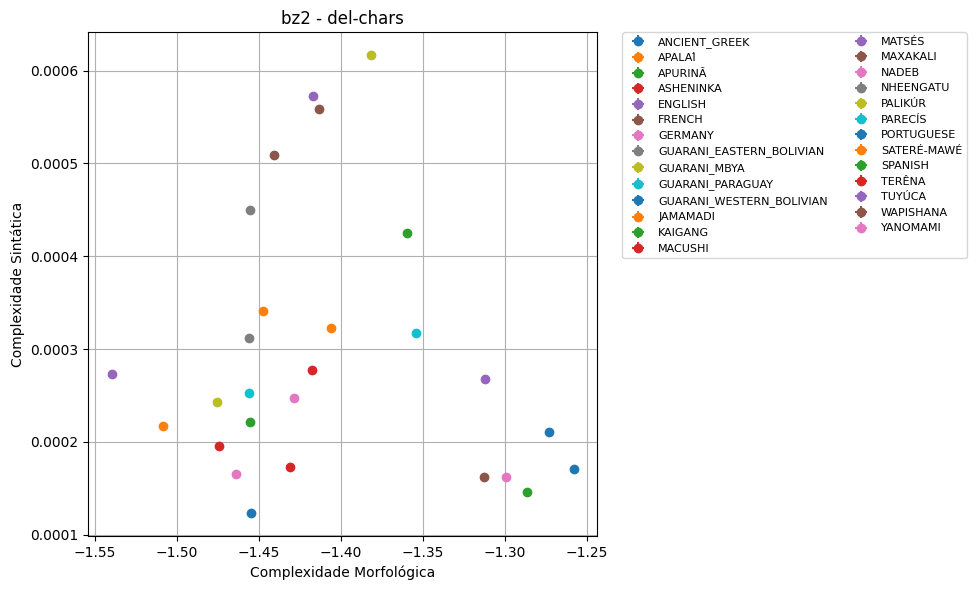

Plotting bz2 - del-chars for Dall


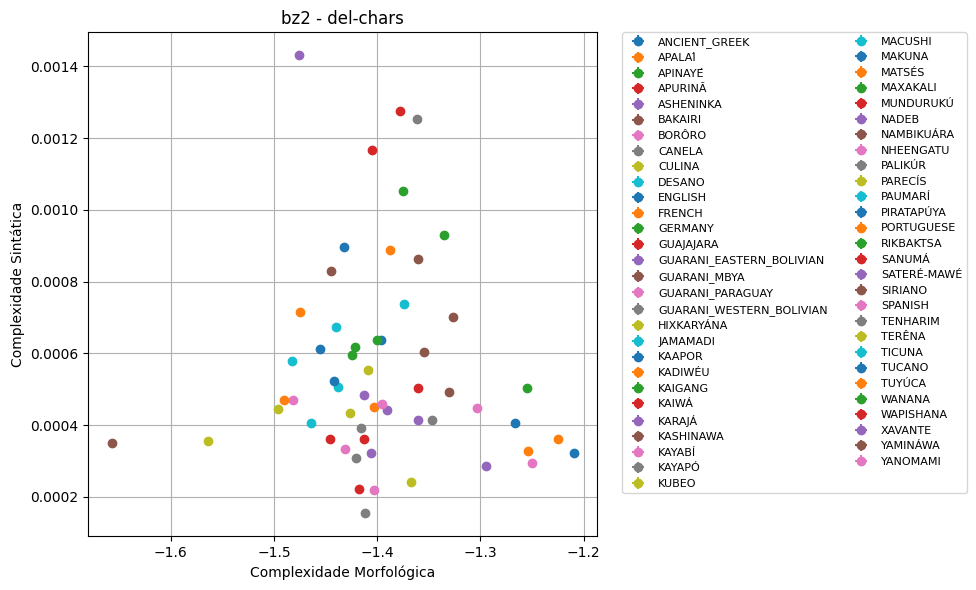

Plotting bz2 - rep-words for d90


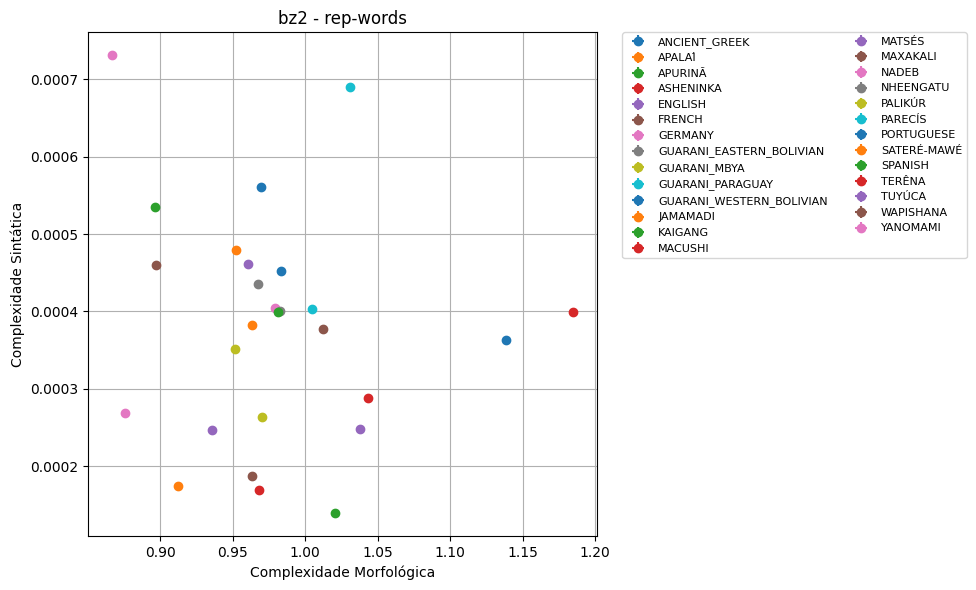

Plotting bz2 - rep-words for Dall


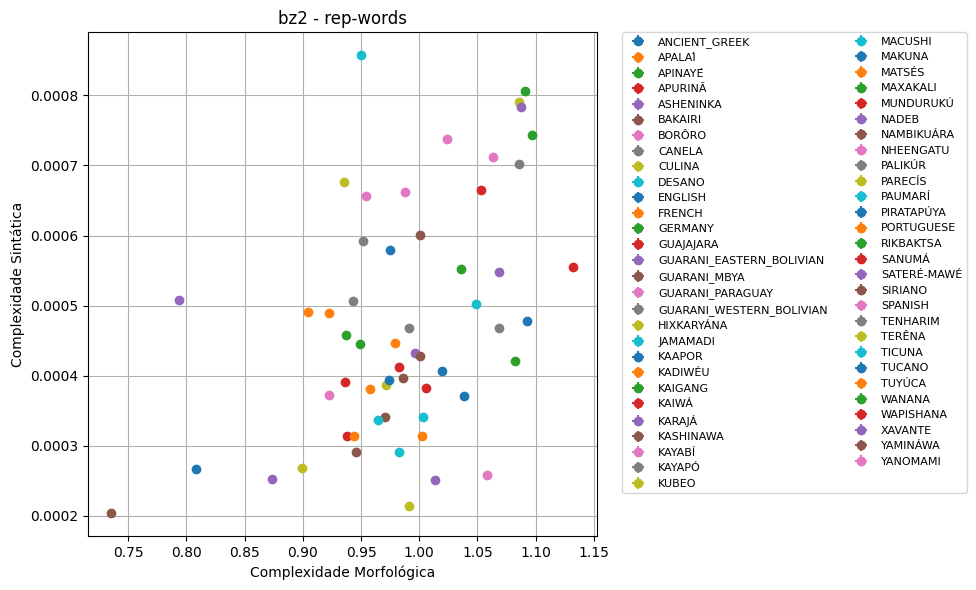

Plotting bz2 - do-nothing for d90


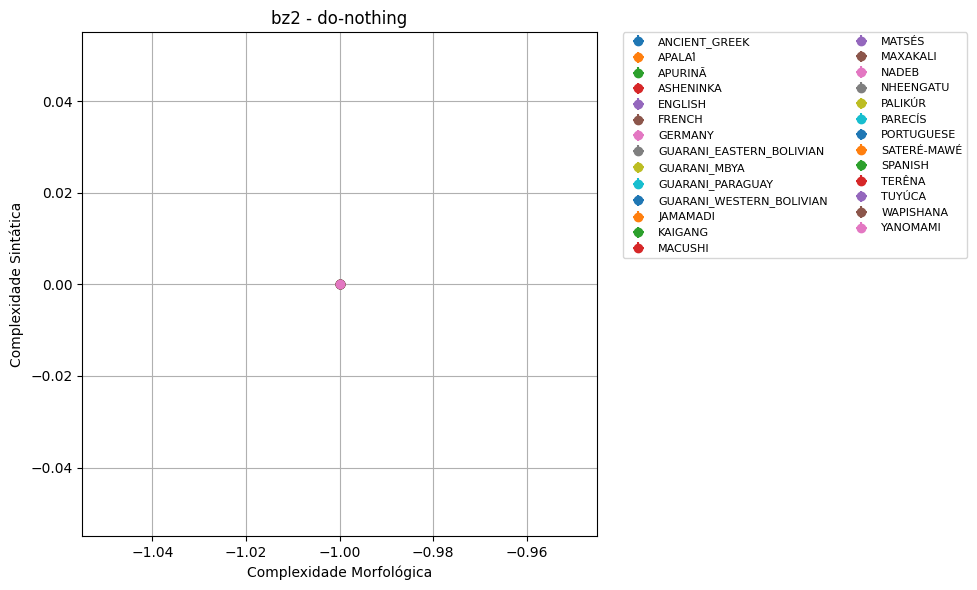

Plotting bz2 - do-nothing for Dall


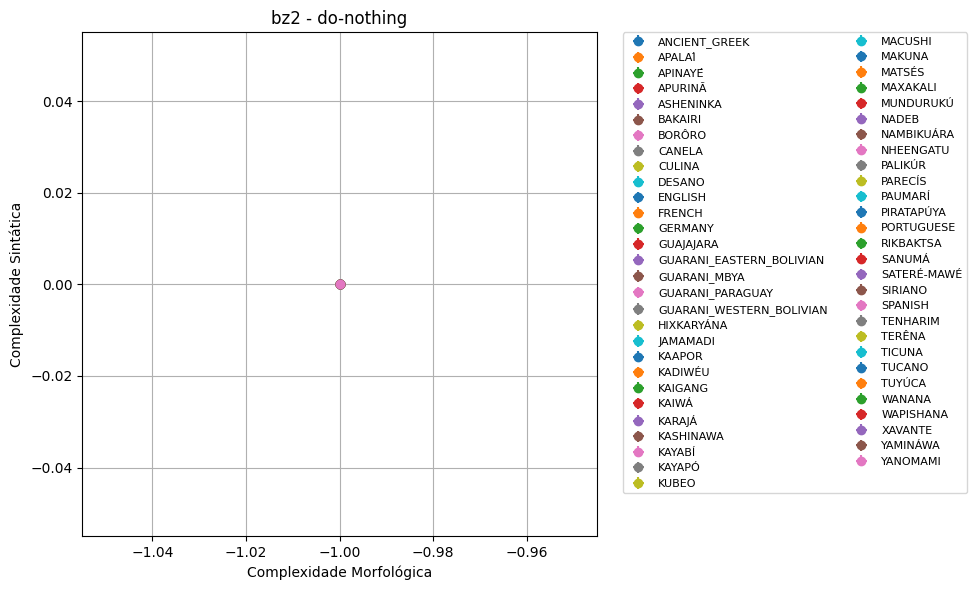

Plotting none - del-verses for d90


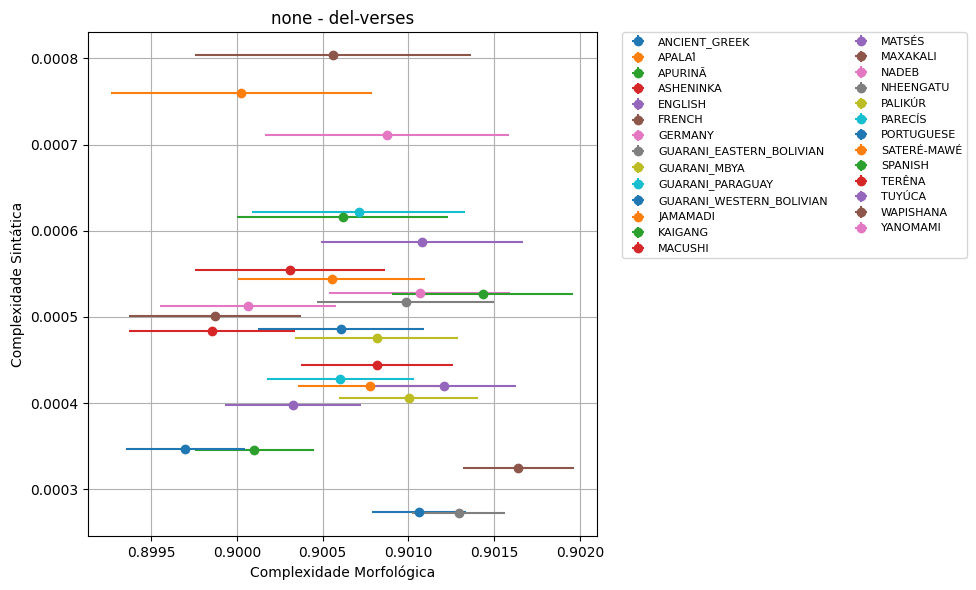

Plotting none - del-verses for Dall


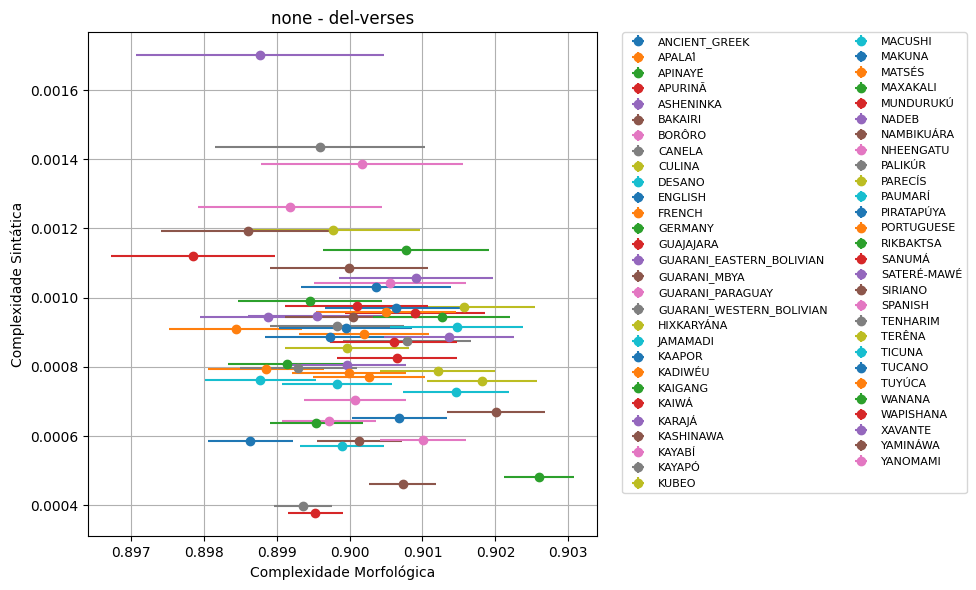

Plotting none - del-words for d90


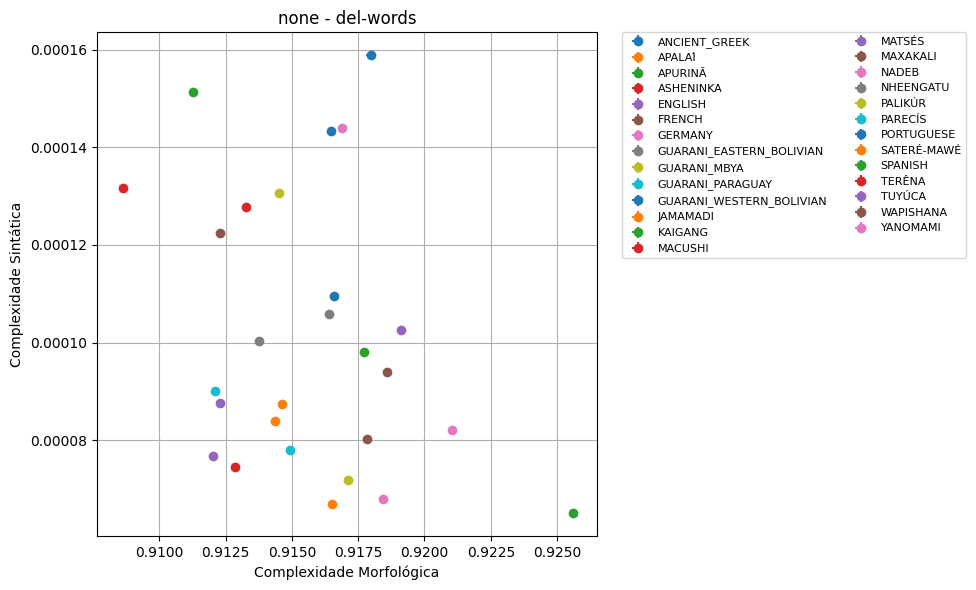

Plotting none - del-words for Dall


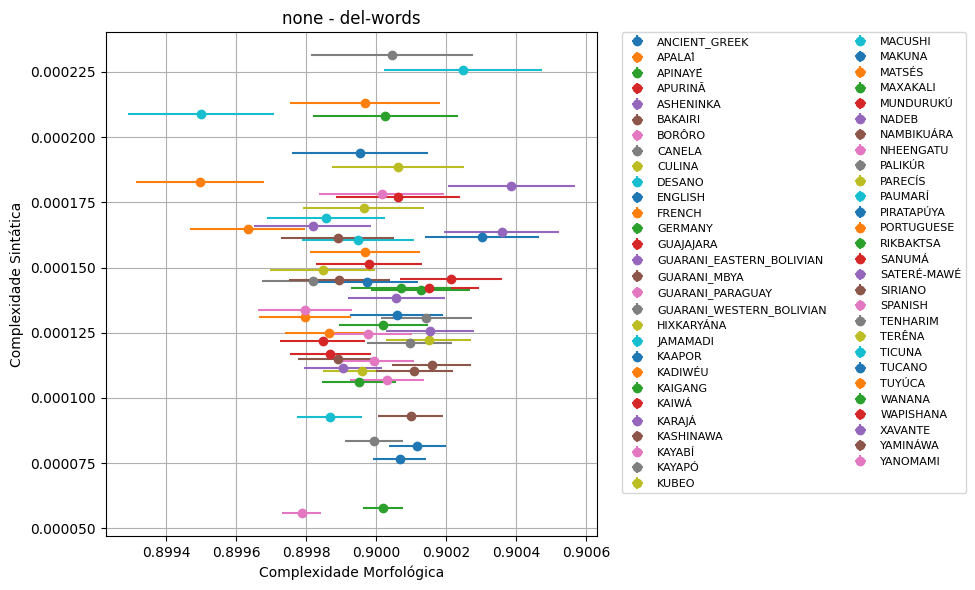

Plotting none - del-chars for d90


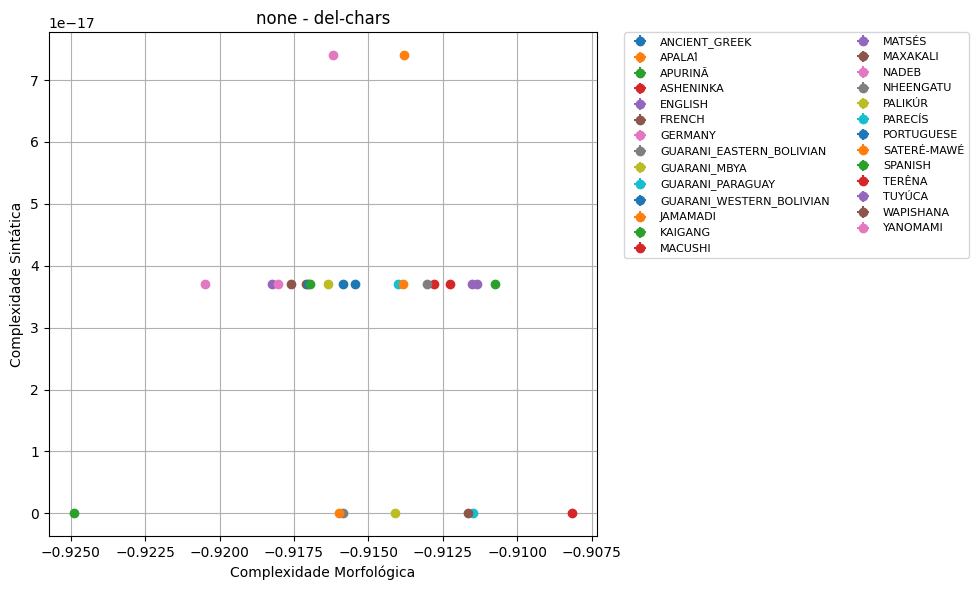

Plotting none - del-chars for Dall


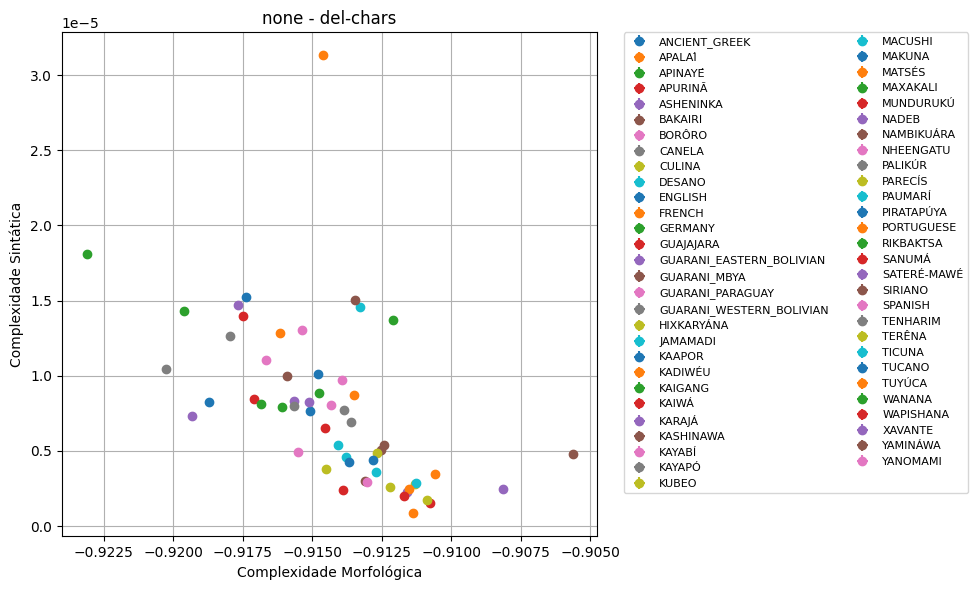

Plotting none - rep-words for d90


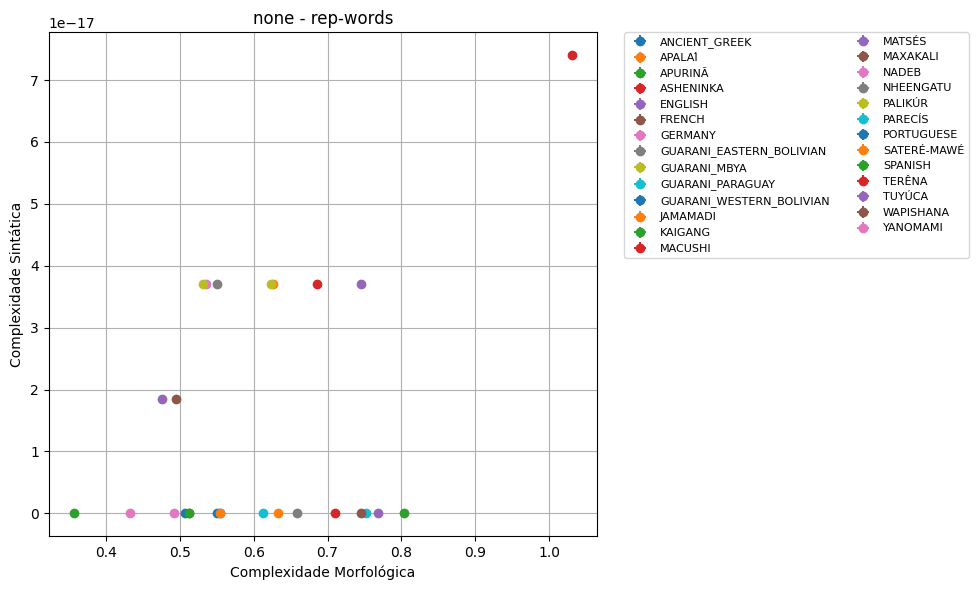

Plotting none - rep-words for Dall


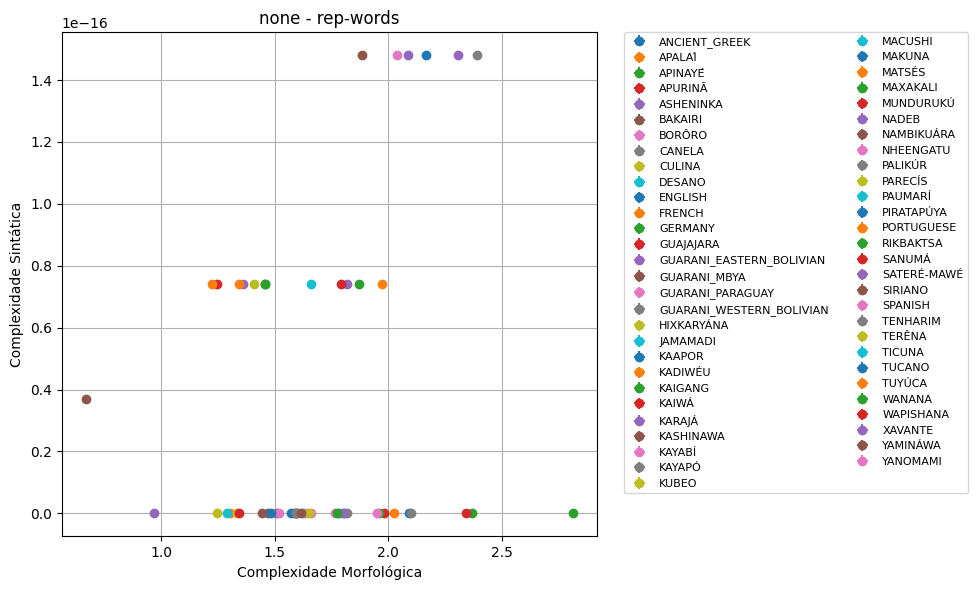

Plotting none - do-nothing for d90


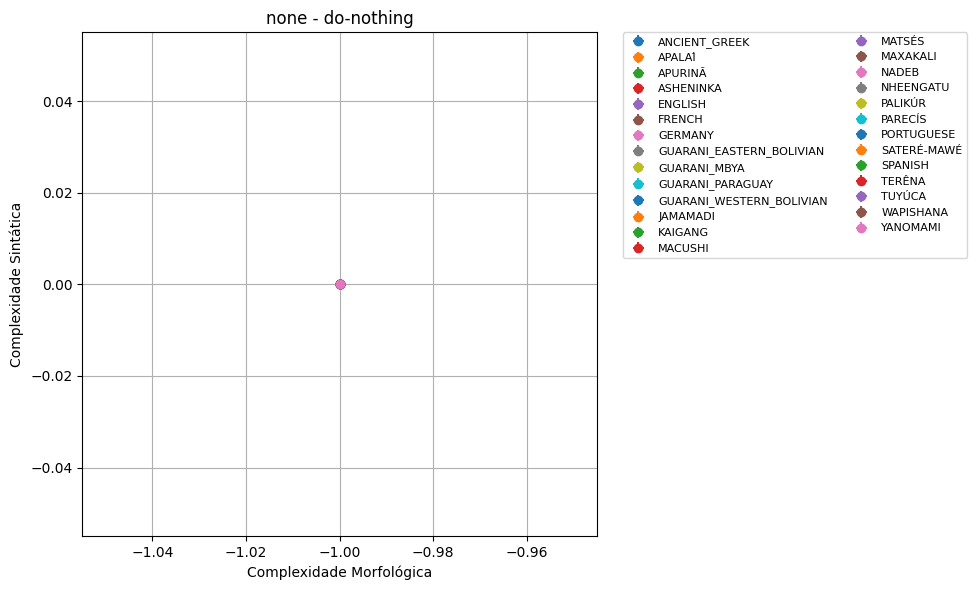

Plotting none - do-nothing for Dall


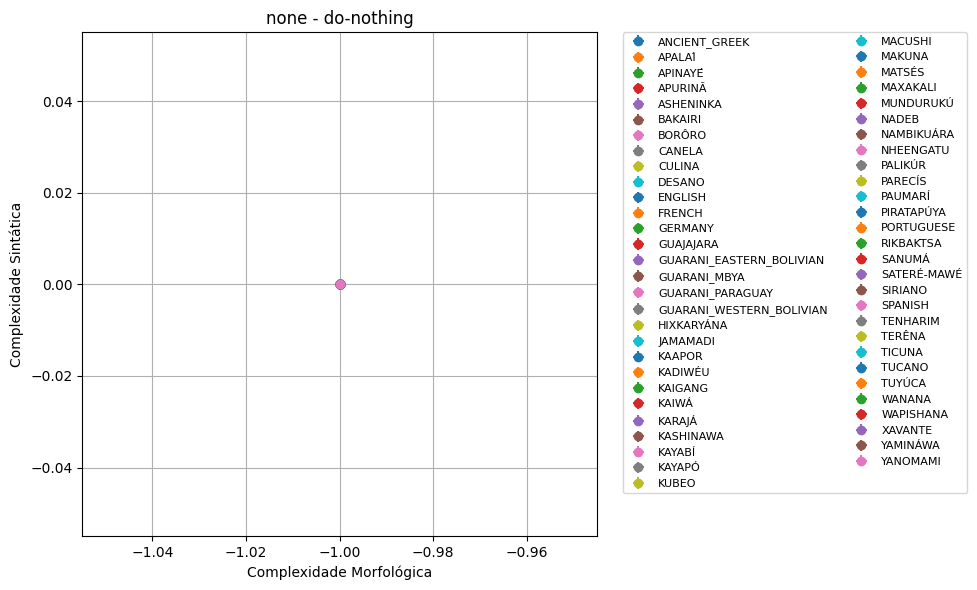

In [95]:
def plot_and_save_error_bars(sem_stats, df, algo, metric, pdf):
    df_algo_metric = df[(df['algorithm'] == algo) & (df['metric'] == metric)]
    sem_algo_metric = sem_stats[(sem_stats['algorithm'] == algo) & (sem_stats['metric'] == metric)]

    plt.figure(figsize=(10, 6))
    for language in df_algo_metric['language'].unique():
        x = df_algo_metric[df_algo_metric['language'] == language]['value'].mean()
        y = sem_algo_metric[sem_algo_metric['language'] == language]['sem'].values[0]
        plt.errorbar(x, y, xerr=y, yerr=0, fmt='o', label=language)

    plt.title(f'{algo} - {metric}')
    plt.xlabel('Complexidade Morfológica')
    plt.ylabel('Complexidade Sintática')
    plt.legend(fontsize=8, ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.tight_layout()
    pdf.savefig()  # Salva a figura atual no PDF
    plt.show()
    plt.close()

selected_algorithms = df90['algorithm'].unique() #['gzip']  # Substitua pelos algoritmos desejados
selected_metrics = df90['metric'].unique() # ['del-chars', 'del-verses']  # Substitua pelas métricas desejadas

# Criar PDF
with PdfPages('../images/h3_with_sem.pdf') as pdf:
    for algo in selected_algorithms:
        for metric in selected_metrics:
            print(f"Plotting {algo} - {metric} for d90")
            plot_and_save_error_bars(sem_90, df90, algo, metric, pdf)

            print(f"Plotting {algo} - {metric} for Dall")
            plot_and_save_error_bars(sem_all, dfall, algo, metric, pdf)